# CITS5508 Assignment2

Amy HUNG (23702699)

In this assignment, we will perform analysis on 3 independent datasets, (i) Breast cancer wisconsin (diagnostic) dataset, (ii) Concrete Slump Test and (iii) Abalone dataset, by applying different supervised machine learning algorithms, such as Decision Tree Classifiers, Decision Tree Regressors and see how different models can be combined to improve the performance of the algorithm by ensemble learning.

In [1]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, accuracy_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import VotingRegressor
from math import sqrt
from scipy.stats import gaussian_kde
from graphviz import Source

In [2]:
# For report presentation
import warnings
warnings.filterwarnings('ignore')

# Part 1 - Breast cancer wisconsin (diagnostic) dataset

In Part I of this assignment, the dataset analysed is Breast cancer wisconsin (diagnostic) dataset, which is collected by Dr. Willian H. Wolberg at the University of Wisconsin Hospital in Madison, Wisconsin. The dataset analysed in this assginment is obtained from Scikit-Learn database, which is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.

The dataset contains data on computed from digitised images of fine needle aspirate (FNA) of breast mass, which describe characteristics of the cell nuclei present in the images, and mapping into 2 classes of diagnosis - (i) malignant and (ii) benign. The dataset analysed covers in total 569 observations.

Since the dataset analysed contains labelled data (diagnosis mapping with 2 classes), we aim to perform binary classification by a specific supervised machine learning algorithm - Decision Tree Classifier, to predict the dignosis in this part. We will further investigate how Decision Tree Classifiers perform under different regularisation hyperparameters, such as max_depth, min_samples_split and min_samples_leaf.

## 1.1 Data loading and overview

### 1.1.1 Loading the dataset

In [3]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df["class"]=pd.Series(data=cancer.target, index=cancer_df.index)

### 1.1.2 Quick overview on the dataset

In [4]:
# Review the dimensions of the dataset
print("Number of rows:", cancer_df.shape[0])
print("Number of columns:", cancer_df.shape[1])

# Quick overview on the 10 instances using head()
cancer_df.head(10)

Number of rows: 569
Number of columns: 31


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [5]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

By looking at the dimension of the dataset, we can see there are in total 569 instances and 31 columns, i.e. 30 features and target class (diagnosis).

From the first glance on the dataset, we can observe:

- target variable (class): types of Dignosis - (i) malignant (class value 0) and (ii) benign (class value 1)

- 30 features: they are measurements on 10 characteristics of cell nuclei, such as size (radius, perimeter and area), shape (concave points, fractal dimension, symmetry and concavity) and surface (smoothness). There are 3 descrpitive statistics provided for all the characteristics, which are (i) mean, (ii) standard error ('error') and (iii) mean of the three largest values ('worst').

Besides, in terms of data completeness, there are no missing values for all the columns. However, we may further look at the distributions of each feature to determine are there any existance of invalid input in later stage, such as outliers and unreasonable values, which may require further treatment in data preparation for classification.

## 1.2 Data Exploration and Visualisation

Although one of the biggest advantages of training a Decision Tree Classifier is less effort for data preparation is needed as compared to other algorithms, such as it does not need normalisation and scaling of data, we still have to perform some data exploration to understand the dataset, ensure the data are appropriate (error-free) and perform some preliminary feature selections to reduce redundancy and improve model performance.

First of all, we will understand the distributions of the variables.

### 1.2.1 Target variable

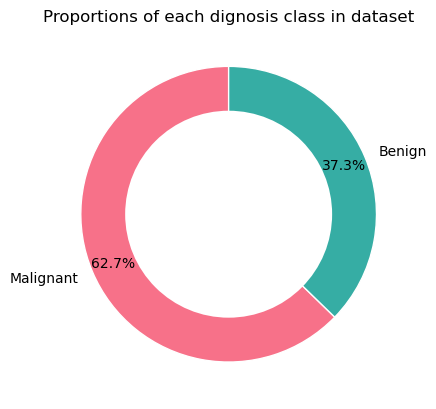

In [6]:
# Counting the number of instance in each class in the dataset
label_counts = cancer_df["class"].value_counts()

# Plotting the counts in a donut chart
fig_donut, ax_donut = plt.subplots()
label_dict = {0:"Malignant", 1: "Benign"}
long_labels = cancer_df['class'].map(label_dict)
colors = sns.color_palette("husl", len(label_counts))
ax_donut.pie(label_counts, labels=long_labels.unique(), colors=colors,
             autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4, edgecolor='w'))
ax_donut.set_title("Proportions of each dignosis class in dataset")
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig_donut.gca().add_artist(centre_circle)
plt.show()

From the above donut chart, we can see there is an approximate 60/40 split between Malignant and Begnign, which we believe it is considered to be a reasonable balance for conducting further binary classification analysis in this assignment.

However, we have to be aware if there are any sampling bias occur in the dataset (we may resample or assign different weights to each class during training process), or if the proportion of the real life population follows such pattern (i.e. the sampling was performed in stratafied sampling method). For the purpose of this assignment, we will assume there is no sampling bias issue in the dataset.

### 1.2.2 Numerical features

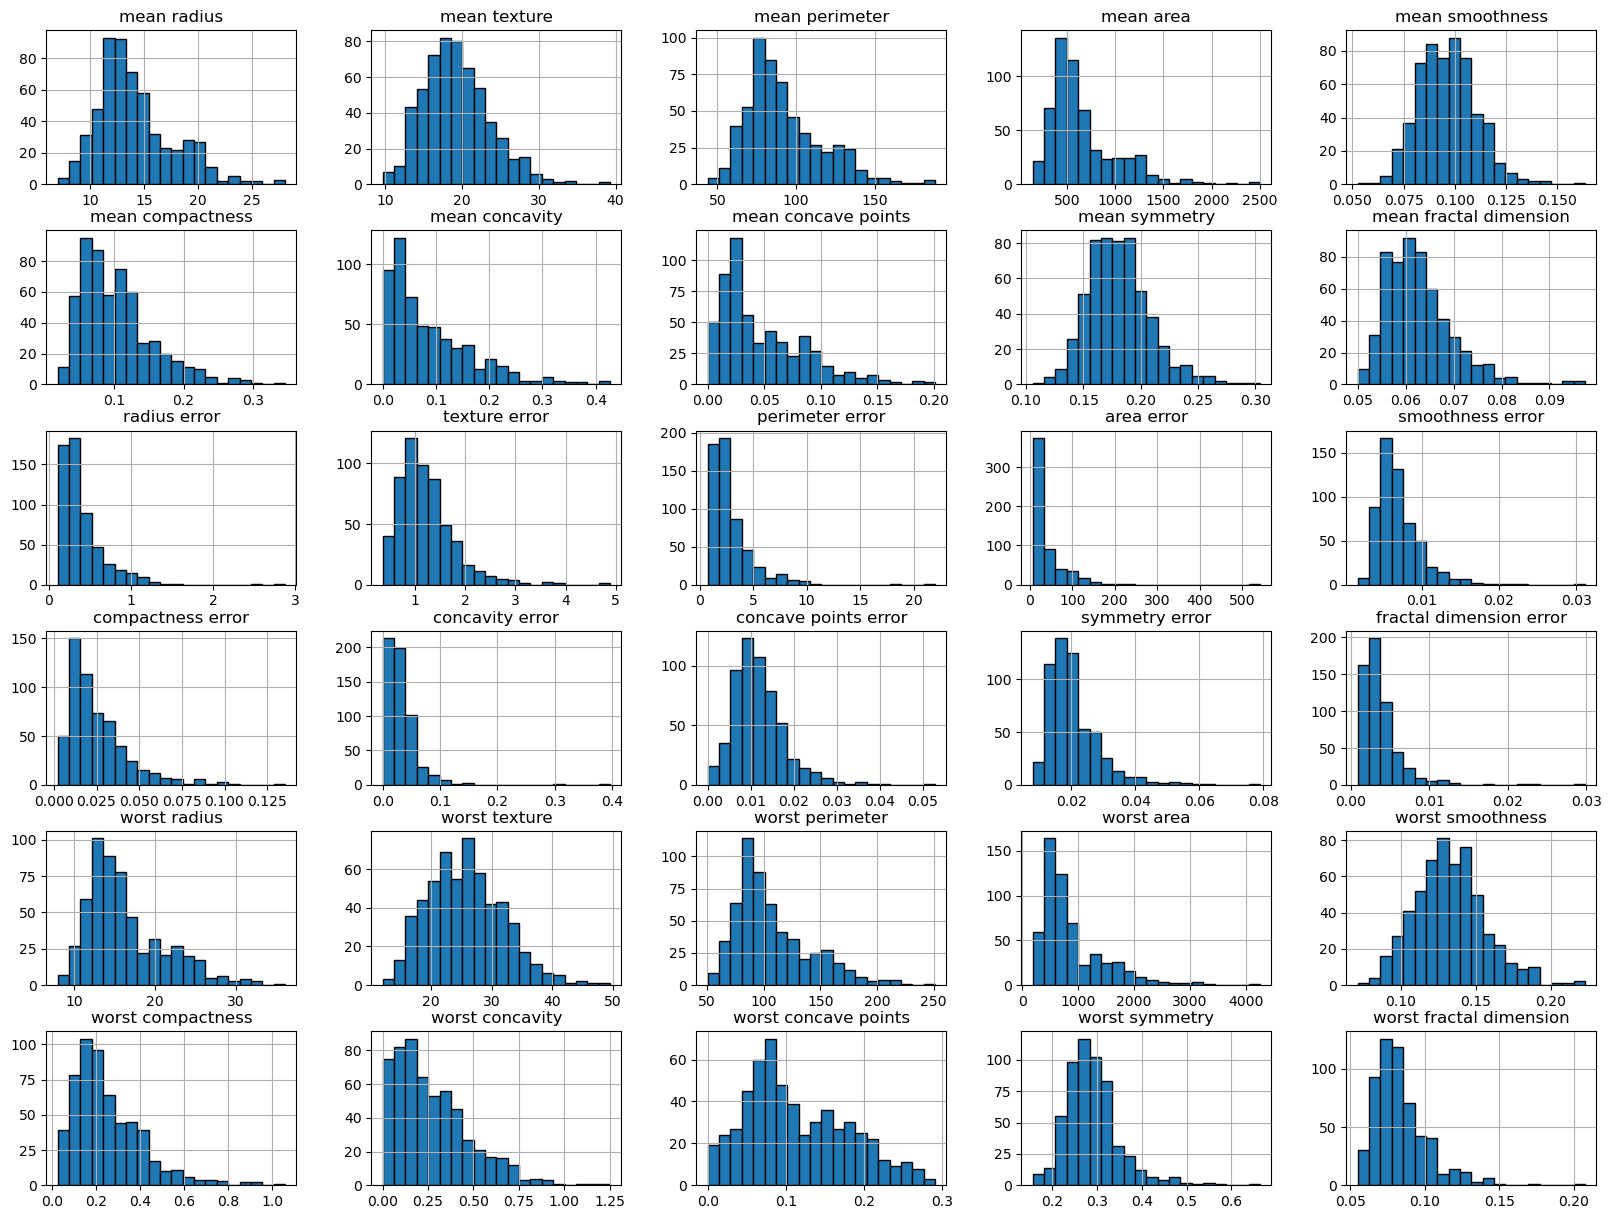

In [7]:
# Remove target from analysis
cancer_feature = cancer_df.drop("class", axis=1)

# Plotting histograms for every numberical variable
cancer_feature.hist(bins=20, figsize=(20,15), edgecolor = "black")
plt.show()

From the above histograms, we can observe:

(i) Different scales on the features: By looking at the x-axis, there are quite different scales in the features, such as the range of mean area is from 100 to 2500, whereas the range of mean concave points is from 0 to 0.2. Since Decision Tree Classifier is not affected by feature scaling, we will not perform normalisation or standardisation on the features in this part.

(ii) Outliers: The distributions of certain features (those related standard errors) seem to be quite right skewed in histograms, which indicate there are some outliers with very large values. Besides, there are no other obvious unreasonable or invalid input noted in the dataset apart from outliers. However, as mentioned previously, Decision Tree Classifier is not sensitive to outliers and there will be no significant impact on the performance. We therefore consider the features are good to go, even having a few outliers.

### 1.2.3 Correlations between features

Apart from only focusing on the distribution of the features, we will also look at the correlations between features and also their correlations to the target variable to determine how much information could these features provide us to perform our classification. 

Moreover, as we have 30 features for binary classification in this dataset, it is meaningful for us to perform a correlation analysis to identify any redundant features (e.g. features having strong linear correlation with other features or features with weak correlations to target). This will help in reducing the dimensionality of the dataset, which will not only improve the performance of the model but also help in interpreting the results. The presence of redundant features can lead to overfitting, which can have a negative impact on the accuracy of the Decision Tree Classifier. Therefore, we would like to identify and remove such features before training the model.

Since there are 30 features in the dataset, it is quite overwhelming if we analyse all their correlation in one go. We will divide the correlation analysis in 3 parts - (i) features related to mean, (ii) features related to standard errors and (iii) features related to maximum.

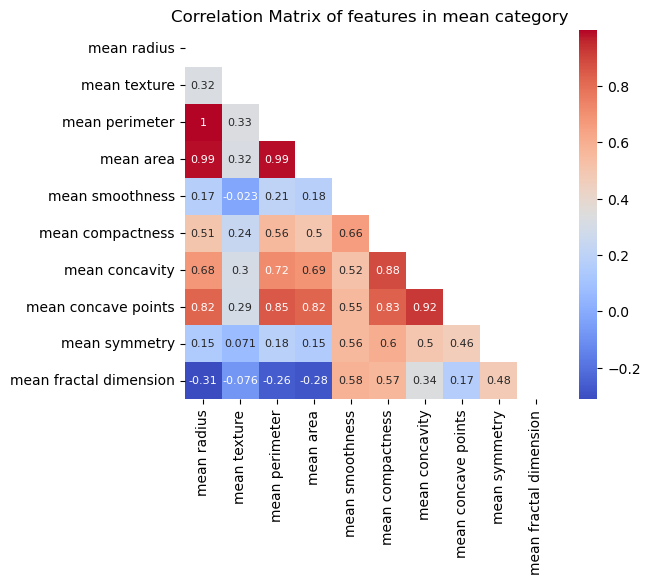

In [8]:
# Subset the dataset to only columns with name "mean"
mean_df = cancer_df.filter(regex='^mean')

# Calculate the correlation matrix of the mean features
mean_corr_matrix = mean_df.corr()
mean_mask = np.zeros_like(mean_corr_matrix, dtype=np.bool)
mean_mask[np.triu_indices_from(mean_mask)] = True
mean_heatmap = sns.heatmap(mean_corr_matrix, mask=mean_mask, annot=True, cmap='coolwarm', square=True, annot_kws={"fontsize": 8})
mean_heatmap.set_title("Correlation Matrix of features in mean category")
plt.show()

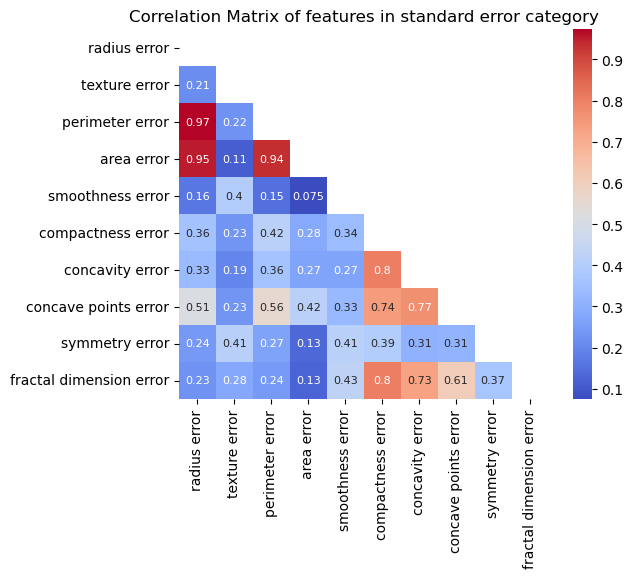

In [9]:
# Subset the dataset to only columns with name "error"
error_df = cancer_df.filter(regex='error$')

# Calculate the correlation matrix of the error features
error_corr_matrix = error_df.corr()
error_mask = np.zeros_like(error_corr_matrix, dtype=np.bool)
error_mask[np.triu_indices_from(error_mask)] = True
error_heatmap = sns.heatmap(error_corr_matrix, mask=error_mask, annot=True, cmap='coolwarm', square=True, annot_kws={"fontsize": 8})
error_heatmap.set_title("Correlation Matrix of features in standard error category")
plt.show()

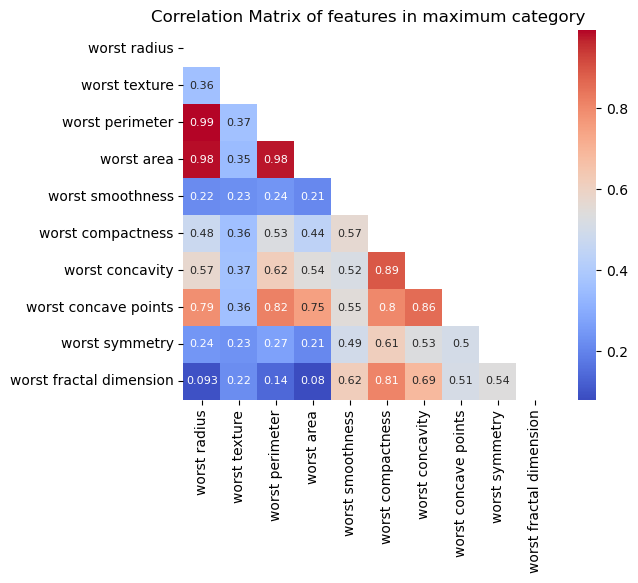

In [10]:
# Subset the dataset to only columns with name "worst"
worst_df = cancer_df.filter(regex='^worst')

# Calculate the correlation matrix of the mean features
worst_corr_matrix = worst_df.corr()
worst_mask = np.zeros_like(worst_corr_matrix, dtype=np.bool)
worst_mask[np.triu_indices_from(worst_mask)] = True
worst_heatmap = sns.heatmap(worst_corr_matrix, mask=worst_mask, annot=True, cmap='coolwarm', square=True, annot_kws={"fontsize": 8})
worst_heatmap.set_title("Correlation Matrix of features in maximum category")
plt.show()

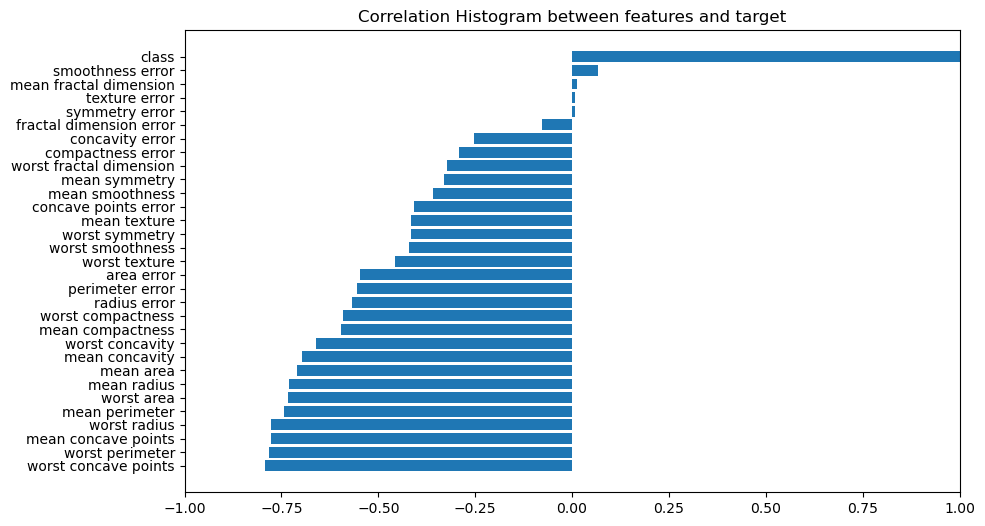

In [11]:
# Computing correlations between target and features
all_corr_matrix = cancer_df.corr()
target_corr = all_corr_matrix.loc[:, "class"].sort_values(ascending=True)

# Plotting the correlation values in a bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(target_corr.index, target_corr.values)
ax.set_title("Correlation Histogram between features and target")
ax.set_xlim([-1, 1])
plt.show()

From the above heatmaps, we can see that in all 3 categories, radius has strong linear correlations with perimeter and area, with correlation coefficients greater than 0.95. Moreover, compactness has strong linear correlations with concavity and concave points as well, with correlation coefficients greater than 0.80. 

Since radius, perimeter and area are all related to the size of the cell nuclei in diagnosing breast cancer, they are closely correlated with each other. Among these 3, we have decided to keep radius since it is the raw feature, which can be used to calculate perimeter and area too. 

As for compactness, concavity and concave points, they are all related to the shape and surface of the cell nuclei. We will keep concave points since the concave points features have stronger correlations (-0.79) with the target (class) than the other 2 as shown from the above correlation histogram.

In [12]:
features_to_drop = ["mean perimeter", "perimeter error", "worst perimeter", 
                   "mean area", "area error", "worst area",
                   "mean concavity", "concavity error", "worst concavity",
                   "mean compactness", "compactness error", "worst compactness"]
cancer_reduced_1 = cancer_df.drop(columns = features_to_drop)

After dropping 12 features, we will look at the overall correlations among the remaining features to see if there are significant correlation, which indicating the existance of potential redundant features.

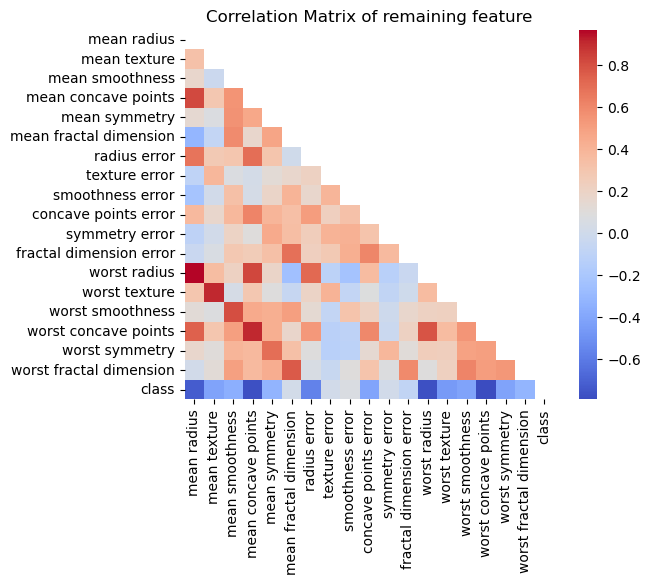

In [13]:
reduce_corr_matrix = cancer_reduced_1.corr()
reduce_mask = np.zeros_like(reduce_corr_matrix, dtype=np.bool)
reduce_mask[np.triu_indices_from(reduce_mask)] = True
reduce_heatmap = sns.heatmap(reduce_corr_matrix, mask=reduce_mask, annot=False, cmap='coolwarm', square=True)
reduce_heatmap.set_title("Correlation Matrix of remaining feature")
plt.show()

From the remaining features, we can observe that the mean of all the measurements have strong linear relationship to the worst measurement. Referring to the correlation histogram, mean measurement and worst measurement have very similar correlation to target. Since worst measurement are the average of the 3 largest values, which contain fewer information than mean measurement. Thus, we believe dropping those worst measurement from the dataset are reasonable.

Moreover, we have noted there are strong linear correlation between mean radius and mean concave points. By referring to the correlation histogram between features and target, we can see mean concave points has stronger correlation to target than mean radius. We consider mean concave points is more informative when classifying the disgnosis. Therefore, mean radius will also be dropped from the dataset.

In [14]:
features_to_drop_2 = ["worst texture", "worst radius", "worst smoothness", "worst concave points", 
                      "worst symmetry", "worst fractal dimension", "mean radius"]
cancer_reduced_2 = cancer_reduced_1.drop(columns = features_to_drop_2)

# Quick review on the remaining features
cancer_reduced_2.head(10)

,mean texture,mean smoothness,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,concave points error,symmetry error,fractal dimension error,class
0,10.38,0.11840,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.01587,0.03003,0.006193,0
1,17.77,0.08474,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01340,0.01389,0.003532,0
2,21.25,0.10960,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.02058,0.02250,0.004571,0
3,20.38,0.14250,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.01867,0.05963,0.009208,0
4,14.34,0.10030,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.01885,0.01756,0.005115,0
5,15.70,0.12780,0.08089,0.2087,0.07613,0.3345,0.8902,0.007510,0.01137,0.02165,0.005082,0
6,19.98,0.09463,0.07400,0.1794,0.05742,0.4467,0.7732,0.004314,0.01039,0.01369,0.002179,0
7,20.83,0.11890,0.05985,0.2196,0.07451,0.5835,1.3770,0.008805,0.01448,0.01486,0.005412,0
8,21.82,0.12730,0.09353,0.2350,0.07389,0.3063,1.0020,0.005731,0.01226,0.02143,0.003749,0
9,24.04,0.11860,0.08543,0.2030,0.08243,0.2976,1.5990,0.007149,0.01432,0.01789,0.010080,0


### 1.2.4 Class distribution in features

After the previous feature selection, we have 11 features regarding 6 characteristics of the cell nuclei in the dataset. We will then look at the distribution of each diagnosis class in these features to better understand the classification as follows. Since it will be too overwhelming to look at the distributions for all the 11 features at the same time, we have separately plotting the pairplots on each characteristics (mean vs standard error) and experiment a combination of 2 characteristics (fractal dimension error and radius error) in this section.

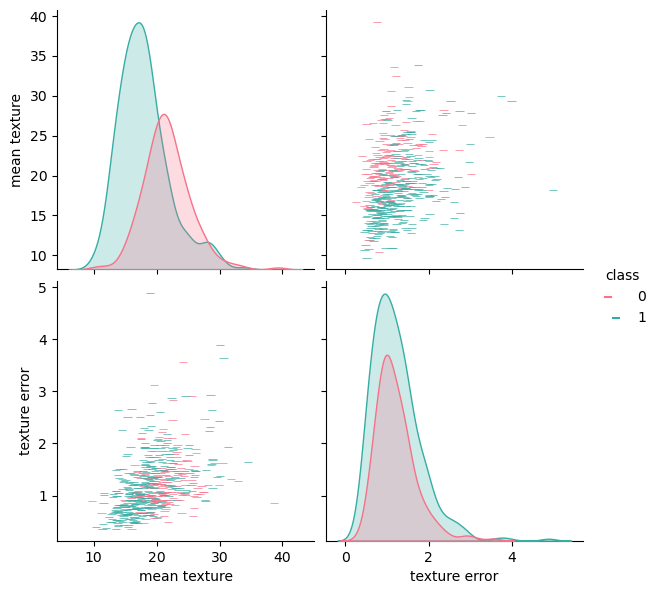

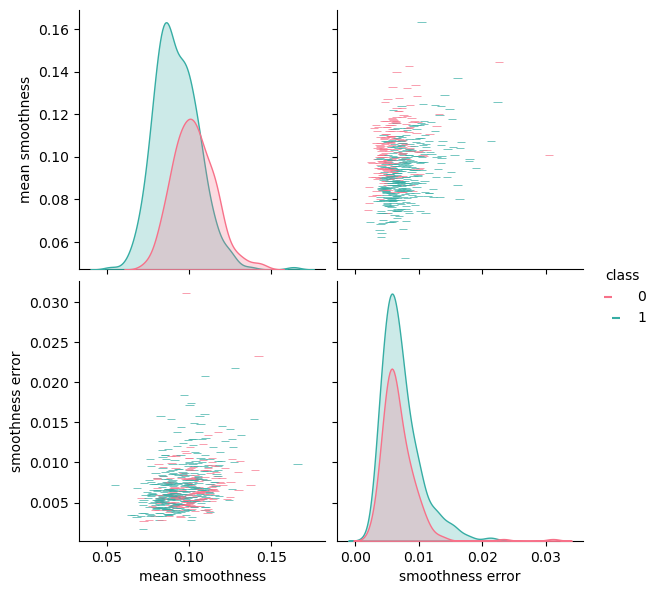

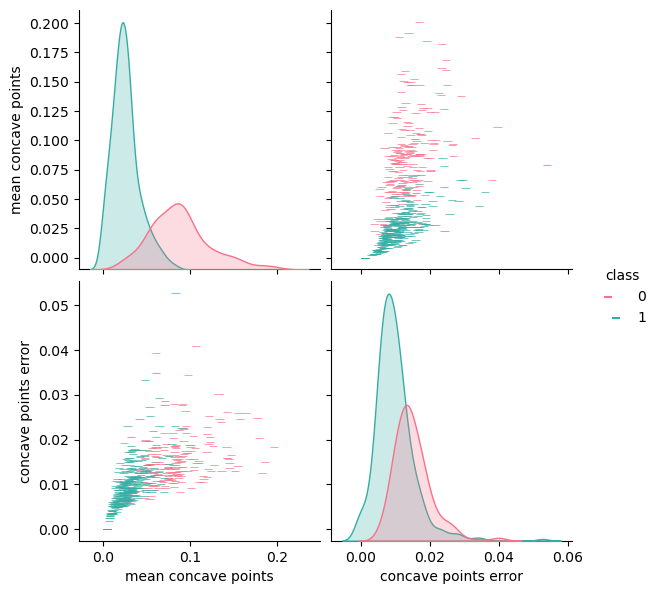

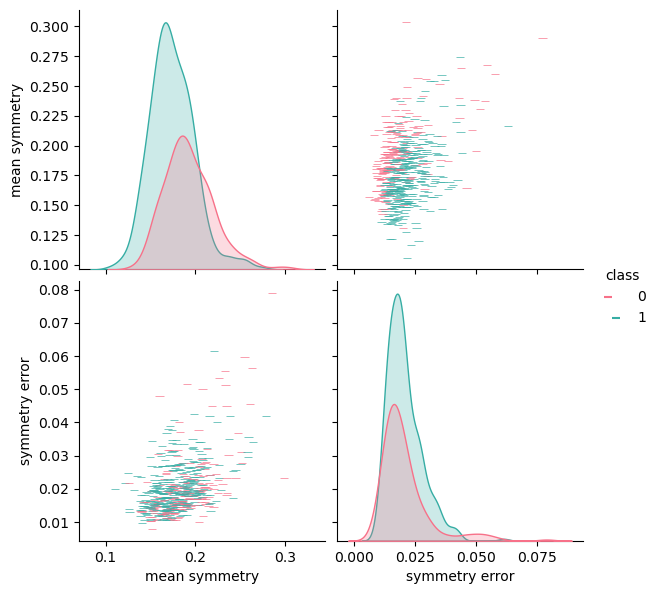

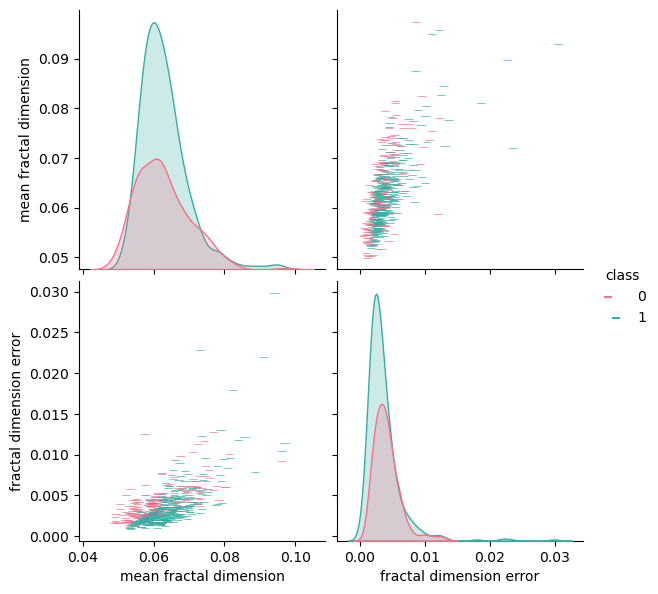

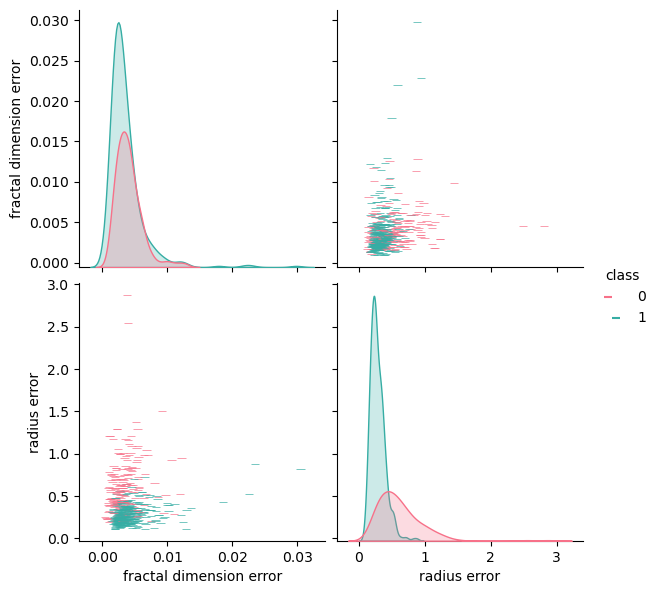

In [15]:
# Pairplots on each characteristics (mean vs standard error)
textures = cancer_reduced_2[["mean texture", "texture error", "class"]]
texture_pair = sns.pairplot(textures, hue='class',palette="husl", markers=[0, 1],size=3)

smoothnesses = cancer_reduced_2[["mean smoothness", "smoothness error", "class"]]
smoothnesses_pair = sns.pairplot(smoothnesses, hue='class',palette="husl", markers=[0, 1],size=3)

concave_points = cancer_reduced_2[["mean concave points", "concave points error", "class"]]
concave_points_pair = sns.pairplot(concave_points, hue='class',palette="husl", markers=[0, 1],size=3)

symmetry = cancer_reduced_2[["mean symmetry", "symmetry error", "class"]]
symmetry_pair = sns.pairplot(symmetry, hue='class',palette="husl", markers=[0, 1],size=3)

fractal_dimensions = cancer_reduced_2[["mean fractal dimension", "fractal dimension error", "class"]]
fractal_dimensions_pair = sns.pairplot(fractal_dimensions, hue='class',palette="husl", markers=[0, 1],size=3)

# Experiment a combination of 2 characteristics (fractal dimension error and radius error)
mix = cancer_reduced_2[["fractal dimension error", "radius error", "class"]]
mix_pair = sns.pairplot(mix, hue='class',palette="husl", markers=[0, 1],size=3)

From the above, we have tried to investigate the distributions of the diagnosis class in a single feature or combination of 2 features. These pairplots illustrate the two classes are more well separated when we look at the combination of 2 features than only one single feature. The reason for this is mainly due to there are more information provided to perform classification. As for one single feature, we can identify there are some features are having more well separated distributions, such as mean concave points, radius error. On the other hand, there are some features are less informative, such as texture error and smoothness error, which have both classes overlapping with each other. We may consider to drop these less informative features if serious overfitting issue identified in later stage.

## 1.3 Setting up a test set

In [16]:
# Randomly split the data into a training set (85%) and test set (15%) as required by the assignment
cancer_x = cancer_reduced_2.drop("class", axis =1)
cancer_y = cancer_reduced_2["class"].copy()

cancer_train_x, cancer_test_x, cancer_train_y, cancer_test_y = train_test_split(cancer_x, cancer_y, 
                                                                                    test_size=0.15, 
                                                                                    random_state=123)

## 1.4 Training Decision Tree Classifiers

### 1.4.1 Decision Tree Classifiers (default values for all hyperparameters)

In [17]:
# Train a decision tree classifier using all default hyperparameters
cancer_dt_default = DecisionTreeClassifier(random_state=123)
cancer_dt_default.fit(cancer_train_x, cancer_train_y)

# Perform predictions on training and test sets
cancer_pred_train_y = cancer_dt_default.predict(cancer_train_x)
cancer_pred_test_y = cancer_dt_default.predict(cancer_test_x)

# Compute the accuracy scores for training and test sets
acc_train = accuracy_score(cancer_train_y, cancer_pred_train_y)
acc_test = accuracy_score(cancer_test_y, cancer_pred_test_y)

print("Accuracy score for training set: {:.4f}".format(acc_train))
print("Accuracy score for test set: {:.4f}".format(acc_test))

Accuracy score for training set: 1.0000
Accuracy score for test set: 0.8488


From the above, we can note the accuracy score for training set is 1.0000, which suggests the Decision Tree Classifier can classify all the training instance accurately. This may occur when the dataset is small and without noise in the data. However, as per our previous data exploration, there are some outliers noted in the error features. So this may not be the case. The other reason for this may be the Decision Tree Classifier is overfitted that it learned the training data so well. We may further confirm it by looking at are there significant drop in the accuracy score on the unseen data (validation set or test set).

We can observe the accuracy score for test set is lower than that of training set. However, the score for test set is still considered to be reasonably satisfactory (0.8488), without significant drop noted as compared to training set. There is no obvious overfitting issue noted from the above. Solely looking at the accuracy score, we are not able to conclude if there is overfitting issue. Thus, we will further construct the Decision Tree diagram to obtain more details in the nodes, such as gini and no. of samples, to confirm whether the classifier has an overfitting issue.

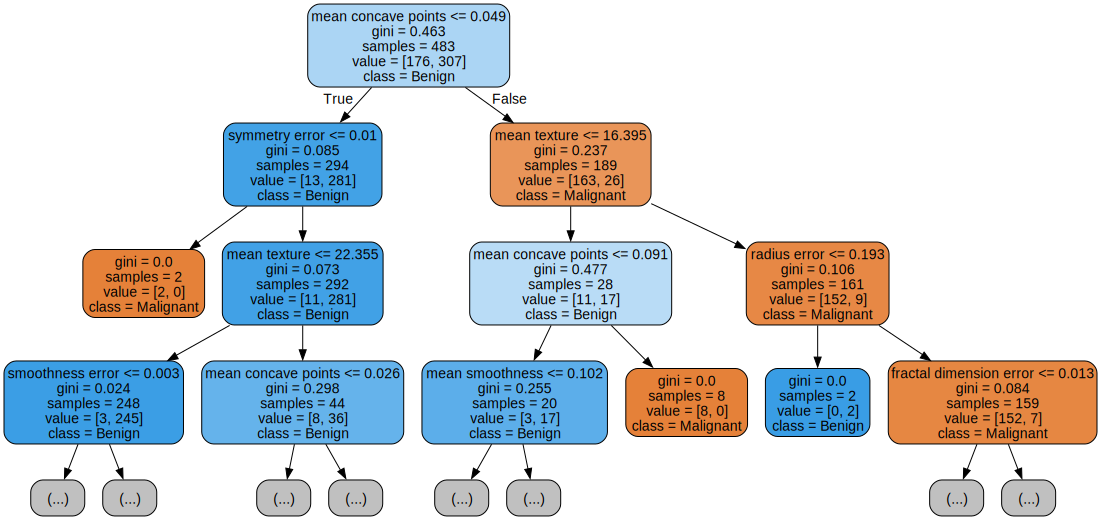

In [18]:
# Visualise a Decision Tree with hyperparameters = default


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

feature_names = cancer_x.columns
class_names = cancer_reduced_2["class"].replace({0: "Malignant", 1: "Benign"})

export_graphviz(
        cancer_dt_default,
        out_file=os.path.join(IMAGES_PATH, "breast_cancer_tree.dot"),
        feature_names=cancer_x.columns,
        class_names=class_names.unique(),
        rounded=True,
        filled=True,
        max_depth=3   #restrict the depth of the tree for the display
    )

Source.from_file(os.path.join(IMAGES_PATH, "breast_cancer_tree.dot"))

For the presentation of this assignment, we are required to restrict the above Decision Tree Classification diagram in max_depth = 3. However, from the full decision tree diagram, we can observe there are some indications of overfitting:

- Split nodes with small gini impurity: there are some nodes already having very small gini impurity, which suggests the samples inside that node are mainly belong to one class. They may not have to split into 2 child nodes anymore as it will lead to overfitting. For instance, the node spliting based on mean texture <= 22.355 having gini impurity to be 0.073, we can see both of its child nodes having majority samples belong to Benign class. And further splits have been observed after the split on these 2 child nodes. Such split cannot provide more meaningful insight in our binary classification of diagnosis. Another example will be the node spliting based on fractual dimension error <= 0.013, which having only 0.084 gini impurity.


- Split nodes with little samples: there are some nodes only have a few samples and majority belongs to a specific class. There shall be no need to further split the nodes into 2 child nodes. For instance, the node spliting based on mean smoothness <= 0.102, which contains only 20 samples (3.5% of total instance). Though the gini impurity seems a bit larger (0.255), but it is only due to the small sample size. Majority of the samples are considered to be Benign in this node. Further split has been noted from it, which means its child nodes will contain even fewer samples. We believe such split cannot provide much meaningful insight in our binary classification of diagnosis, but to overfit the model.


- Leaf nodes with little samples: most of the leaf nodes in this Decision Tree Classifier only contains less than 10 samples (~1.7% of total instance). 

As a reult, we believe such classifier is considered to be overfitted with high variance. In order to improve the generalised performance in the Decision Tree Classifier, we can add some hyperparameters, such as max_depth, min_samples_leaf, into the model training. We will look at the performance of the generalised Decision Tree Classifiers by tuning a few hyperparameters in the following sections.

### 1.4.2 Decision Tree Classifier (max_depth = 3)

In [19]:
# Train a decision tree classifier with max_depth = 3
cancer_dt_2 = DecisionTreeClassifier(max_depth=3, random_state=123)
cancer_dt_2.fit(cancer_train_x, cancer_train_y)

# Perform predictions on training and test sets
cancer_pred_train_y_2 = cancer_dt_2.predict(cancer_train_x)
cancer_pred_test_y_2 = cancer_dt_2.predict(cancer_test_x)

# Compute the accuracy scores for training and test sets
acc_train_2 = accuracy_score(cancer_train_y, cancer_pred_train_y_2)
acc_test_2 = accuracy_score(cancer_test_y, cancer_pred_test_y_2)

print("Accuracy score for training set: {:.4f}".format(acc_train_2))
print("Accuracy score for test set: {:.4f}".format(acc_test_2))

Accuracy score for training set: 0.9565
Accuracy score for test set: 0.8605


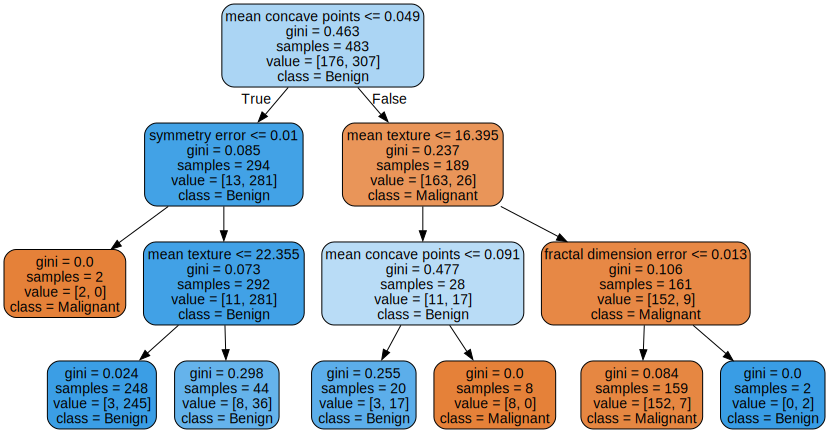

In [20]:
export_graphviz(
        cancer_dt_2,
        out_file=os.path.join(IMAGES_PATH, "breast_cancer_tree.dot"),
        feature_names=cancer_x.columns,
        class_names=class_names.unique(),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "breast_cancer_tree.dot"))

Comparison between max_depth = 3 and default hyperparameters:

As compared to the Decision Tree Classifier (with all default hyperparameter) in Section 1.4.1, this Decision Tree Classifier (with max_depth hyperparameter = 3) has a lower training accuracy score of 0.9565. Moreover, the test accuracy score is higher for this Decision Tree Classifier (0.8605) than the previous one (0.8488), which means this classifier performs better on the unseen data. 

The reason for these difference is mainly due to this Decision Tree Classifier is simpler and more generalised as restricted by the regularisation hyperparameter max_depth set in this section. This regularisation hyperparameter (max_depth) controls the depth of the Decision Tree Classifier, the tree has to be stopped once it reached the condition set by hyperparameter. This allows it performs better in unseen data by trading part of the learning from training data (lower variance with higher bias).

In terms of the Decision Tree Classification Diagram, the Decision Tree Classifier with max_depth = 3 appears to be more generalised than the one in Section 1.4.1. The major difference is this Decision Tree Classifier stopped at depth = 3, there is no further split performed after it and its leaf nodes contain more samples and larger gini impurities. 

### 1.4.3 Decision Tree Classifier (min_samples_split = 5)

In [21]:
# Train a decision tree classifier using min_samples_split = 5
cancer_dt_3 = DecisionTreeClassifier(min_samples_split=5, random_state=123)
cancer_dt_3.fit(cancer_train_x, cancer_train_y)

# Perform predictions on training and test sets
cancer_pred_train_y_3 = cancer_dt_3.predict(cancer_train_x)
cancer_pred_test_y_3 = cancer_dt_3.predict(cancer_test_x)

# Compute the accuracy scores for training and test sets
acc_train_3 = accuracy_score(cancer_train_y, cancer_pred_train_y_3)
acc_test_3 = accuracy_score(cancer_test_y, cancer_pred_test_y_3)

print("Accuracy score for training set: {:.4f}".format(acc_train_3))
print("Accuracy score for test set: {:.4f}".format(acc_test_3))

Accuracy score for training set: 0.9917
Accuracy score for test set: 0.8605


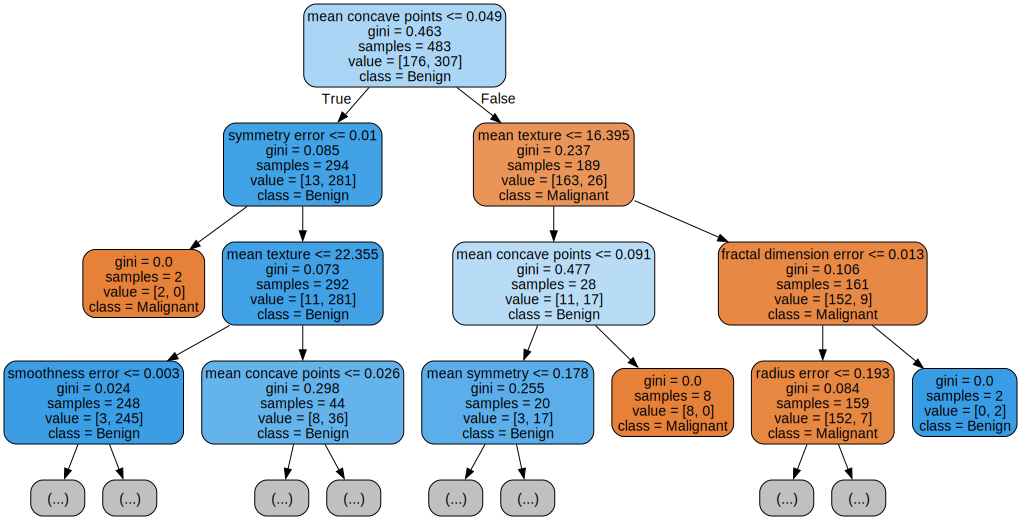

In [22]:
export_graphviz(
        cancer_dt_3,
        out_file=os.path.join(IMAGES_PATH, "breast_cancer_tree.dot"),
        feature_names=cancer_x.columns,
        class_names=class_names.unique(),
        rounded=True,
        filled=True,
        max_depth=3   #restrict the depth of the tree for the display
    )

Source.from_file(os.path.join(IMAGES_PATH, "breast_cancer_tree.dot"))

For the presentation of this assignment, we are required to restrict the above Decision Tree Classification diagram in min_samples_split = 5. However, from the full decision tree diagram, we can observe:

Comparison between min_samples_split = 5 and default hyperparameters:

Similar to the comparison between max_depth = 3 and default hyperparameters in the previous section, this Decision Tree Classifier (with min_samples_split = 5) has a lower training accuracy score of 0.9917 and higher test accuracy score of 0.8605 as compared to the Decision Tree Classifier (with all default hyperparameter) in Section 1.4.1. This classifier performs better on the unseen data than the default one since it is simpler and more generalised as restricted by the regularisation hyperparameter min_samples_split, which serves as similar purpose as max_depth hyperparameter. The min_samples_split regularisation hyperparameter controls the minimum number of samples for a node to further split into 2 child nodes, the node has to be stopped splitting once it fail to fulfil the condition set by hyperparameter. This allows it performs better in unseen data by trading part of the learning from training data (lower variance with higher bias). Thus, fewer splits are noted in the decision tree classification diagram than the default one and the leaf nodes having larger sample size and gini impurities. 

Comparison between min_samples_split = 5 and max_depth = 3:

Though both setting of hyperparameters aim to help in better generalisation in the Decision Tree Classifier and having same test accuracy score of 0.8605, their training accuracy scores are different with min_samples_split = 5 to be 0.9917 and max_depth = 3 to be 0.9565. Decision Tree Classifier (with min_samples_split = 5) performs better in the training set, which may indicate it is more overfitted than the Decision Tree Classifier (with max_depth = 3). To confirm the overfitting issue, we can see from their decision tree classification diagrams. The one in min_samples_split = 5 has depth = 8, which appears to be more complex than the one with max_depth = 3. Moreover, the leaf nodes are having much smaller sample size as compared to the one with max_depth = 3, even though we have set the min_samples_split = 5. It seems setting min_samples_split = 5 is not effective enough to improve the overfitting issue of the Decision Tree Classifier, higher threshold may require. We will perform grid search in later section to find the optimal hyperparameter combination for training a Decision Tree Classifier.

### 1.4.4 Decision Tree Classifier (min_samples_leaf = 5)

In [23]:
# Train a decision tree classifier using min_samples_leaf = 5
cancer_dt_4 = DecisionTreeClassifier(min_samples_leaf=5, random_state=123)
cancer_dt_4.fit(cancer_train_x, cancer_train_y)

# Perform predictions on training and test sets
cancer_pred_train_y_4 = cancer_dt_4.predict(cancer_train_x)
cancer_pred_test_y_4 = cancer_dt_4.predict(cancer_test_x)

# Compute the accuracy scores for training and test sets
acc_train_4 = accuracy_score(cancer_train_y, cancer_pred_train_y_4)
acc_test_4 = accuracy_score(cancer_test_y, cancer_pred_test_y_4)

print("Accuracy score for training set: {:.4f}".format(acc_train_4))
print("Accuracy score for test set: {:.4f}".format(acc_test_4))

Accuracy score for training set: 0.9689
Accuracy score for test set: 0.8721


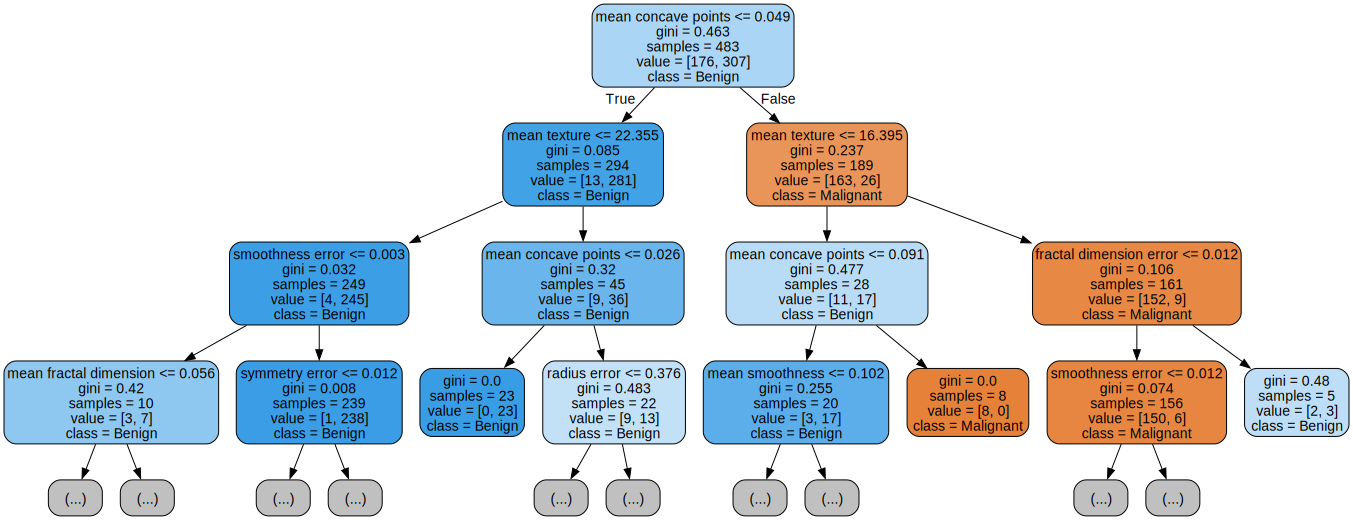

In [24]:
export_graphviz(
        cancer_dt_4,
        out_file=os.path.join(IMAGES_PATH, "breast_cancer_tree.dot"),
        feature_names=cancer_x.columns,
        class_names=class_names.unique(),
        rounded=True,
        filled=True,
        max_depth=3   #restrict the depth of the tree for the display
    )

Source.from_file(os.path.join(IMAGES_PATH, "breast_cancer_tree.dot"))

For the presentation of this assignment, we are required to restrict the above Decision Tree Classification diagram in min_samples_leaf = 5. However, from the full decision tree diagram, we can observe:

Comparison between min_samples_leaf = 5 and default hyperparameters:

Similar to the Decision Tree Classifiers in Section 1.4.2 and 1.4.3, this Decision Tree Classifier (with min_samples_leaf = 5) has a lower training accuracy score of 0.9689 and higher test accuracy score of 0.8721 as compared to the Decision Tree Classifier (with all default hyperparameter) in Section 1.4.1. This classifier performs better on the unseen data than the default one since it is simpler and more generalised as restricted by the regularisation hyperparameter min_samples_leaf, which serves as similar purpose as max_depth and min_samples_split hyperparameters. The min_samples_leaf regularisation hyperparameter controls the minimum number of samples included in a leaf node, the node has to be stopped splitting to fulfil the condition set by hyperparameter. This allows it performs better in unseen data by trading part of the learning from training data (lower variance with higher bias). Thus, fewer splits are noted in the decision tree classification diagram than the default one and the leaf nodes having larger sample size and gini impurities.

Comparison between min_samples_leaf = 5 and max_depth = 3:

Though both setting of hyperparameters aim to help in better generalisation in the Decision Tree Classifier, they obtained different accuracy scores in both training set and test set. Decision Tree Classifier (with min_samples_leaf = 5) has a higher training accuarcy score of 0.9689 (vs 0.9565 for max_depth = 3) and a higher test accuracy score of 0.8721 (vs 0.8605 with max_depth = 3). 

Higher training accuracy score in min_samples_leaf = 5 score indicate the model learns better in training data, which may be an indicator of overfitting. By comparing their decision tree diagrams, we can observe the depth of Decision Tree Classification Diagram with min_samples_leaf = 5 is doubled to that of max_depth = 3. More splits and leaf nodes having much smaller sample size and gini impurities are noted in the Decision Tree Classification Diagram with min_samples_leaf = 5, where some of the splits are considered to be less meaningful. It seems the classifier is still overfitted and setting min_samples_leaf = 5 is not effective enough to improve the overfitting issue of the default Decision Tree Classifier. With a higher value of min_samples_leaf, the tree will stop splitting earlier, resulting in larger leaf nodes with higher gini impurities. We will perform grid search in later section to find the optimal hyperparameter combination for training a Decision Tree Classifier.

Higher test accuracy score in min_samples_leaf = 5 score may indicate the model performs better in unseen data as well (having a better balance in both variance and bias as compared to max_depth = 3), or it may just happen by chance. To confirm this, we may perform a K-fold cross validation and compare the performance in unseen data again in validation sets. However, owing to the scope of this assignment, we will not perform the cross validation in this part, and we assume it is due to better performance.

Comparison between min_samples_leaf = 5 and min_samples_split = 5:

Though both setting of hyperparameters aim to help in better generalisation in the Decision Tree Classifier, they obtained different accuracy scores in both training set and test set. Decision Tree Classifier (with min_samples_leaf = 5) has a lower training accuarcy score of 0.9689 (vs 0.9917 with min_samples_split = 5) and a higher test accuracy score of 0.8721 (vs 0.8605 with min_samples_split = 5). 

Higher training accuracy score in min_samples_split = 5 score indicate the model learns better in training data, which may be an indicator of overfitting. By comparing their decision tree diagrams, we can observe the depth of Decision Tree Classification Diagram with min_samples_split = 5 is deeper than that of min_samples_leaf = 5. More splits and leaf nodes having smaller sample size and gini impurities are noted in the Decision Tree Classification Diagram with min_samples_split = 5, where some of the splits are considered to be less meaningful. It seems model with min_sample_leaf = 5 is more generalised, though there are still some of the split in the tree can be neglected, such as the node splitting based on symmetry error <= 0.012 and fractal dimension error <= 0.003. With a higher value of min_samples_leaf, the tree will stop splitting earlier, resulting in larger leaf nodes with higher gini impurities. We will perform grid search in later section to find the optimal hyperparameter combination for training a Decision Tree Classifier.

Higher test accuracy score in min_samples_leaf = 5 score may indicate the model performs better in unseen data as well (having a better balance in both variance and bias as compared to min_samples_split = 5), or it may just happen by chance. To confirm this, we may perform a K-fold cross validation and compare the performance in unseen data again in validation sets. However, owing to the scope of this assignment, we will not perform the cross validation in this part, and we assume it is due to better performance.

To summarise, based on the above analysis, it seems all of the hyperparmeters have improved the overfitting issue in the default Decision Tree Classifier, while max_depth = 3 provided us the most generalised Decision Tree Classifier by looking at the test set accuracy score and the decision tree diagram.

### 1.4.5 Decision Tree Classifier (best combination of above hyperparameters under Grid Search)

In [25]:
params = {
    "max_depth": list(range(2, 8)), #8 to be the max. depth from default model
    "min_samples_split": list(range(2, 25)), #25 to be ~5% of total instance
    "min_samples_leaf": list(range(2, 25))} #25 to be ~5% of total instance

cancer_dt_grid = DecisionTreeClassifier(random_state=123)

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=123), params, verbose=1, cv=3)
grid_search_cv.fit(cancer_train_x, cancer_train_y)

print("Best parameters:", grid_search_cv.best_params_)
print("Best cross-validation score: {:.4f}".format(grid_search_cv.best_score_))

Fitting 3 folds for each of 3174 candidates, totalling 9522 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best cross-validation score: 0.9296


In this part, in order to determine the optimal combination between max_depth, min_samples_split and min_samples_leaf to train a Decision Tree Classifier, we have used grid search and 3-fold cross validation. From the above, we can observe the combination of having max_depth = 5, min_samples_split = 10 and min_samples_leaf = 3 gives us the highest average cross-validation accuracy score of 0.9296 as a result of grid search. 

As compared to the hyperparameters we used in the pervious sections, in terms of max_depth, the best Decision Tree Classifier allows to have 2 more levels of split, which it may be more complex with higher variance and lower bias. In terms of min_samples_split, the best Decision Tree Classifier is more strict in the size of the split nodes. Every split node has to contain at least 10 samples (vs 5 samples in Section 1.4.3). Thus, the Decision Tree Classifier will expect to be more generalised in this aspect with lower variance and higher bias. Lastly, in terms of min_samples_leaf, the best Decision Tree Classifier allows smaller leaf nodes of having sample size = 3 (vs 5 samples in Section 1.4.4). Thus, the Decision Tree Classifier will expect to be less generalised in this aspect with higher variance and lower bias.

In this best combination of hyperparameter, we are expecting a Decision Tree Classifier with no more 5 levels of split and every leaf node is having at least 3 samples and nodes will only split into child nodes if they have at least 10 samples there. The model will stop once it cannot meet one of these hyperparameters. Therefore, as compared to all the previous Decision Tree Classifier, we will get a model in between the most complex and overfitted default Decision Tree Classifier (in section 1.4.1) and the simpliest and most generalised one (in Section 1.4.2).

In [26]:
#Train a decision tree classifier using the best combination of hyperparameters
cancer_dt_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=10, random_state=123)
cancer_dt_best.fit(cancer_train_x, cancer_train_y)

# Perform predictions on training and test sets
cancer_pred_train_y_best = cancer_dt_best.predict(cancer_train_x)
cancer_pred_test_y_best = cancer_dt_best.predict(cancer_test_x)

# Compute the accuracy scores for training and test sets
acc_train_best = accuracy_score(cancer_train_y, cancer_pred_train_y_best)
acc_test_best = accuracy_score(cancer_test_y, cancer_pred_test_y_best)

print("Accuracy score for training set: {:.4f}".format(acc_train_best))
print("Accuracy score for test set: {:.4f}".format(acc_test_best))

Accuracy score for training set: 0.9752
Accuracy score for test set: 0.8837


In terms of accuracy score in both training (known data) and test set (unseen data), the best Decision Tree Classifier itself performs reasonably satisfactory with score > 0.88.

As compared to all the previous classifiers:

Ranking of training accuracy score is:
max_depth=3 (0.9565) < min_samples_leaf=5 (0.9689) < best combination (0.9752) < min_samples_split=5 (0.9917) < default (1.0000)

Ranking of test accuracy score is:
default (0.8488) < max_depth=3, min_samples_split=5 (0.8605) < min_samples_leaf=5 (0.8721) < best combination (0.8837)

From the above rankings among all classifiers, we can see the Decision Tree Classifier with the best combination of hyperparameter has a reasonably good learning in the training data and performs the best in the unseen data. It appears to have the best balance in the tradeoff between learning and generalistion.

We will further investigate the performance of all these Decision Tree Classifiers with different performance measure in the next section.

## 1.5 Performance measures

In this part, we are analysing a dataset related to the diagnosis of breast cancer. The main goal in the classification is to identify if the call nuclei will be cancerable or not, and further medical treatment will be performed according to the classification result. As a result, it is important for the test to identify as many malignant cases (cancerable) to ensure the patients are having the appropriate treatment as soon as possible and increase their survival rates. Thus, in terms of different performance measures, we believe (i) sensitivity (recall) and (ii) predictive value of a negative test are the most important measures. As they ensure that the classification correctly identifies as many patients with cancer as possible and correctly rules out the patients in those without it. In this situation, false positives can be tolerated, as they can be followed up with further testing or clinical evaluation. As a result, we will prefer to pick the model with the highest recall and predictive value of a negative test for this dataset. 

In this section, we will compare the performance of all the Decision Tree Classifiers in (i)recall, (ii)predictive value of a negative test and (iii) precision. The reason we would like to investigate the precision of the models is due to a model with high recall and predictive value of a negative test, but very poor precision, the model is still not considered to be satisfactory. We aim to maintain a good balance between precision and recall as well.

Performance measures on Decision Tree Classifier (default):



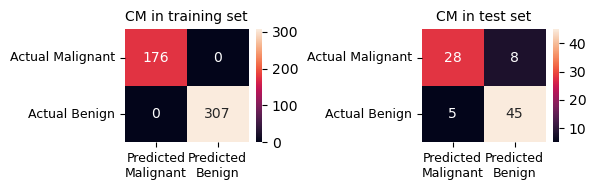


Precision: Training set 1.0000 ; Test set 0.8491
Recall: Training set 1.0000 ; Test set 0.9000
Predictive value of a negative test: Training set 1.0000 ; Test set 0.8485

Performance measures on Decision Tree Classifier (max_depth=3):



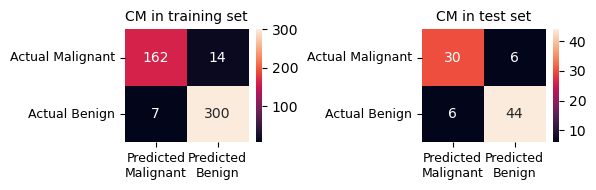


Precision: Training set 0.9554 ; Test set 0.8800
Recall: Training set 0.9772 ; Test set 0.8800
Predictive value of a negative test: Training set 0.9586 ; Test set 0.8333

Performance measures on Decision Tree Classifier (min_samples_split=5):



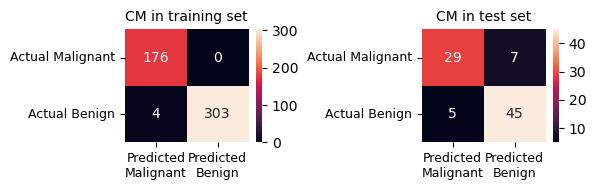


Precision: Training set 1.0000 ; Test set 0.8654
Recall: Training set 0.9870 ; Test set 0.9000
Predictive value of a negative test: Training set 0.9778 ; Test set 0.8529

Performance measures on Decision Tree Classifier (min_samples_leaf=5):



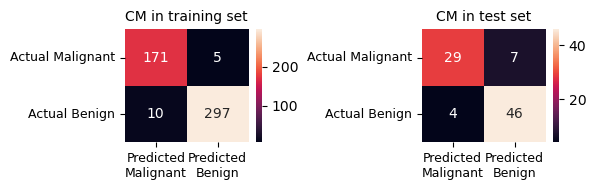


Precision: Training set 0.9834 ; Test set 0.8679
Recall: Training set 0.9674 ; Test set 0.9200
Predictive value of a negative test: Training set 0.9448 ; Test set 0.8788

Performance measures on Decision Tree Classifier (best combination):



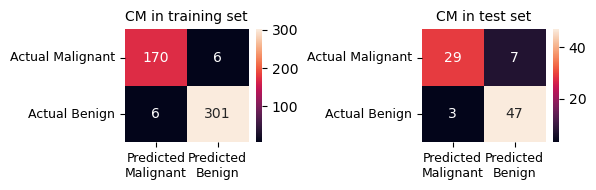


Precision: Training set 0.9805 ; Test set 0.8704
Recall: Training set 0.9805 ; Test set 0.9400
Predictive value of a negative test: Training set 0.9659 ; Test set 0.9062


In [27]:
# Function for performance measures on (i) confusion matrix, (ii) precision, (iii) recall and (iv) NPV
def performance_measure(model):
    y_pred_train = model.predict(cancer_train_x)
    y_pred_test = model.predict(cancer_test_x)
    
    # Computating the confusion matrix
    cm_train = confusion_matrix(cancer_train_y, y_pred_train)
    cm_test = confusion_matrix(cancer_test_y, y_pred_test)    

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6,2))
    
    x_labels = ["Predicted\nMalignant", "Predicted\nBenign"]
    y_labels = ["Actual Malignant", "Actual Benign"]
    sns.heatmap(cm_train, annot=True, fmt='d', xticklabels=x_labels, yticklabels=y_labels, ax=axes[0])
    sns.heatmap(cm_test, annot=True, fmt='d', xticklabels=x_labels, yticklabels=y_labels, ax=axes[1])
    
    axes[0].set_title("CM in training set", fontsize = 10)
    axes[1].set_title("CM in test set", fontsize = 10)
    axes[0].tick_params(labelsize=9)
    axes[1].tick_params(labelsize=9)
    plt.tight_layout()
    plt.show()    

    # Computing precision and recall
    precision_train = precision_score(cancer_train_y, y_pred_train)
    precision_test = precision_score(cancer_test_y, y_pred_test)
    recall_train = recall_score(cancer_train_y, y_pred_train)
    recall_test = recall_score(cancer_test_y, y_pred_test)
    print("\nPrecision: Training set {:.4f}".format(precision_train), "; Test set {:.4f}".format(precision_test))
    print("Recall: Training set {:.4f}".format(recall_train), "; Test set {:.4f}".format(recall_test))

     # Computing predictive values of a negative test
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(cancer_train_y, y_pred_train).ravel()
    NPV_train = tn_train / (tn_train + fn_train)
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(cancer_test_y, y_pred_test).ravel()
    NPV_test = tn_test / (tn_test + fn_test)
    print("Predictive value of a negative test: Training set {:.4f}".format(NPV_train), "; Test set {:.4f}".format(NPV_test))

print("Performance measures on Decision Tree Classifier (default):\n")
performance_measure(cancer_dt_default)
print("\nPerformance measures on Decision Tree Classifier (max_depth=3):\n")
performance_measure(cancer_dt_2)
print("\nPerformance measures on Decision Tree Classifier (min_samples_split=5):\n")
performance_measure(cancer_dt_3)
print("\nPerformance measures on Decision Tree Classifier (min_samples_leaf=5):\n")
performance_measure(cancer_dt_4)
print("\nPerformance measures on Decision Tree Classifier (best combination):\n")
performance_measure(cancer_dt_best)

In comparing the performance of different hyperparameters and to select the most appropriate one, we generally comparing the performance in validation set, while for investigating the performance of an individual trained model, we generally look at different performance measures in test set. However, for the scope of this assignment, we have presented both training set and test set in this performance measure section.

By looking at the above confustion matrices, we can see all of the Classifiers actually perform well in both training and test set, with majority instances are in the main diagonal representing correct classification. Based on the figures in the confusion matrices, we have further computed the precision, recall and predictive value of a negative test for each classifier. All of them appear all the Classifiers could provide us reasonably promising classification, with all the measures > 0.83. Looking at into details of the test set performance measures:

Ranking of test set Precision is: 

default (0.8491) < min_samples_split=5 (0.8654) < min_samples_leaf=5 (0.8679) < best combination (0.8704) < max_depth=3 (0.8800)

Ranking of test set Recall is: 

max_depth=3 (0.8800) < default, min_samples_split=5 (0.9000) < min_samples_leaf=5 (0.9200) < best combination (0.9400)

Ranking of test set Predictive value of a negative test is:

max_depth=3 (0.8333) < default (0.8485) < min_samples_split=5 (0.8529) < min_samples_leaf=5 (0.8788) < best combination (0.9062)

From the above, we can see the Decision Tree Classifier with the best combination of hyperparameter performs the best in recall (0.9400) and predictive value of a negative test (0.9062), while at the same time, it keeps a reasonably satisatfactory precision of 0.8704 among all the Decision Tree Classifiers we analysed in this section. We consider it is the best model among all.

However, owing to the scope of this assignment, we are only required to analyse the dataset by Decision Tree Classifier algorithm and investigate 3 of the hyperparameters (max_depth, min_samples_split and min_samples_leaf). We understand the classification task may perform better if we train the model in other machine learning algorithms, such as k-NN algorithm and SVM algorithm, or we can further consider other regularisation hyperparameters of Decision Tree Classifier, for instance max_leaf_nodes and max-features. Hence, a possible step would be including more hyperparameters and other algorithms, and compare against the result to the best Decision Tree Classifier.

# Part 2 - Concrete Slump Test dataset

In Part 2 of this assignment, the dataset analysed is Concrete Slump Test dataset, which can be obtained from the UCI Machine Learning website (
https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/).

The dataset contains 103 instances on predicting the concrete compressive strength of high performance concrete (HPC) after 28 days and determining the workability with the measurements of slump and slump flow, which are influenced by different concrete ingredients. 

In this part, we aim to focus on one of the output variables, Compressive Strength (28-day)(Mpa). Since our target variable this time is a numerical variable, we are no longer performing classification task, but regression. Apart from only training individual regressors, we will explore an ensemble machine learning method (Voting regressor), which aggregate the predictions of a group of predictors (base estimators), to provide more accurate predictions than individual regressors. For the scope of this assignment, we will apply (i) linear SVM regressor, (ii) linear regressor (using the LinearRegressor class) and (iii) Stochastic Gradient Descent (SGD) regressor as the 3 base estimators of the Voting regressor.

## 2.1 Data loading and overview

### 2.1.1 Loading the dataset

In [28]:
slump = pd.read_csv("slump_test.data")

### 2.1.2 Quick overview on the dataset

In [29]:
# Check the dimensions of the dataset
print("Number of rows:", slump.shape[0])
print("Number of columns:", slump.shape[1])

# Quick overview on the first 10 instances using head()
slump.head(10)

Number of rows: 103
Number of columns: 11


,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
5,6,147.0,89.0,115.0,202.0,9.0,860.0,829.0,23.0,55.0,25.21
6,7,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.0,20.0,38.86
7,8,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.5,58.5,36.59
8,9,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.5,51.0,32.71
9,10,304.0,0.0,140.0,214.0,6.0,895.0,722.0,19.0,51.0,38.46


In [30]:
slump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

By looking at the dimension of the dataset, we can see there are in total 103 instances and 11 columns.

From the first glance on the first 10 rows, these 11 columns are Unique ID (No), 3 output variables (SLUMP(cm), FLOW(cm) and Compressive Strength (28-day)(Mpa)) and 7 features (Cement, Slag, Fly ash, Water, SP, Coarse Aggr. and Fine Aggr.).

Moreover, all of the columns are numberical variables and there are no missing values for all the columns. Though there are no null values noted in the dataset, we have to further investigate if there are any unreasonable inputs or outliers in the later stage, which may require further treatment in data preparation for regression.

## 2.2 Data Exploration and Visualisation

For the purpose of this assignment, we will focus our analysis on predicting one of the output variables (Compressive Strength (28-day)(Mpa)) by different regression models. As a result, we will drop the other 2 output variables in this analysis, which are SLUMP(cm) and FLOW(cm).

From our preliminary overview on the dataset, we noted there is a Unique ID column (No), which is not informative for our prediction. We will drop the No column from our analysis. Furthermore, we observed some of the column names are quite lengthy, such as our target variable "Compressive Strength (28-day)(Mpa)". For easier processing in this assignment, we will rename this column to "Strength".

In [31]:
features_to_drop = ["No", "SLUMP(cm)", "FLOW(cm)"]
slump_clean = slump.drop(columns = features_to_drop)
slump_clean = slump_clean.rename(columns = {"Compressive Strength (28-day)(Mpa)": "Strength"})
slump_clean.head(10)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Strength
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82
5,147.0,89.0,115.0,202.0,9.0,860.0,829.0,25.21
6,152.0,139.0,178.0,168.0,18.0,944.0,695.0,38.86
7,145.0,0.0,227.0,240.0,6.0,750.0,853.0,36.59
8,152.0,0.0,237.0,204.0,6.0,785.0,892.0,32.71
9,304.0,0.0,140.0,214.0,6.0,895.0,722.0,38.46


### 2.2.1 Target variable

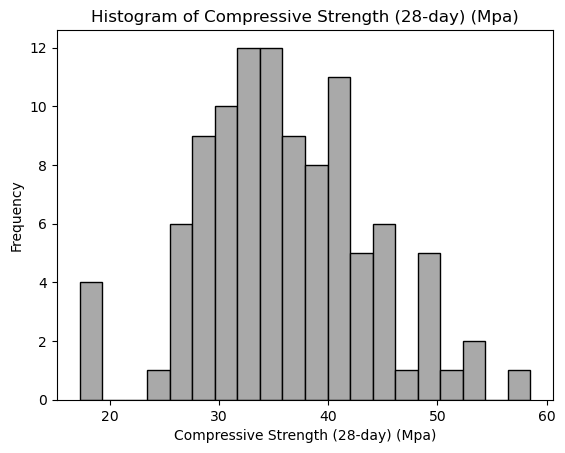

In [32]:
# Plot histogram of "Strength" variable
plt.hist(slump_clean["Strength"], bins=20, edgecolor = "black", color = "darkgrey")
plt.xlabel("Compressive Strength (28-day) (Mpa)")
plt.ylabel("Frequency")
plt.title("Histogram of Compressive Strength (28-day) (Mpa)")
plt.show()

From the above, we can observe the target variable is approximately symmetric and normal distributed, suggest the residuals in the regression model will be normally distributed. We expect the target can be reasonably predicted by training appropriate machine learning regressors, which normally distributed target and residuals is one of the key assumptions for many regression algorithms, including linear regression, SVM regression, and SGD regression. .

### 2.2.2 Features

In [33]:
# Remove target from analysis
slump_feature = slump_clean.drop("Strength", axis=1)
slump_feature.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000


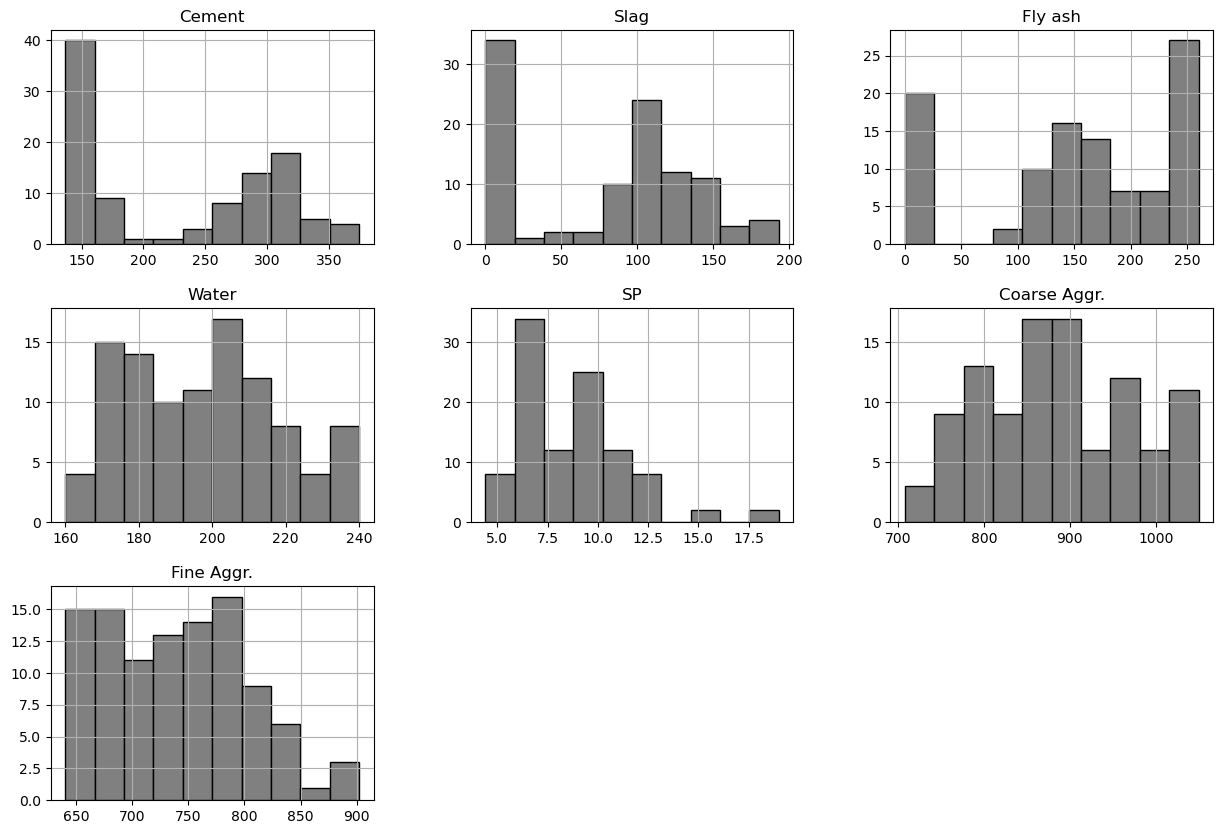

In [34]:
# Plotting histograms for every numberical variable
slump_feature.hist(figsize=(15,10), color = "grey", edgecolor = "black")
plt.show()

From the above histograms, we can observe:

(i) Outliers: When we look at the distributions in Cement, Slag and Fly ash, we can see there are quite a number of instances having very small balances. These may create some noise in the data and affect the performance of the regressors trained. However, for this assignment, we are not able to obtain more instance to replace these instances having such outliers, and it is not fesible for us to drop all these instances which may cause us having insufficient data to train the model, given that we have only 103 instances in total (a small dataset). We may perform standardisation on the data, which may somehow reduce a bit on the impact caused by the outliers.

(ii) Different scales on the features: By looking at the x-axis of the above (with can also been seen from the positions of boxes in the above boxplot), there are different scales in the features. For instance, the range of Fine Aggr is between 650 and 900, whereas the range of SP is between 4 to 19. Since some of the machine learning algorithms, such as SVM regressor, are sensitive in scales of features (may have bias to those with greater magnitude features), we will perform transformation to standardise their scales in later stage.



### 2.2.3 Correlations

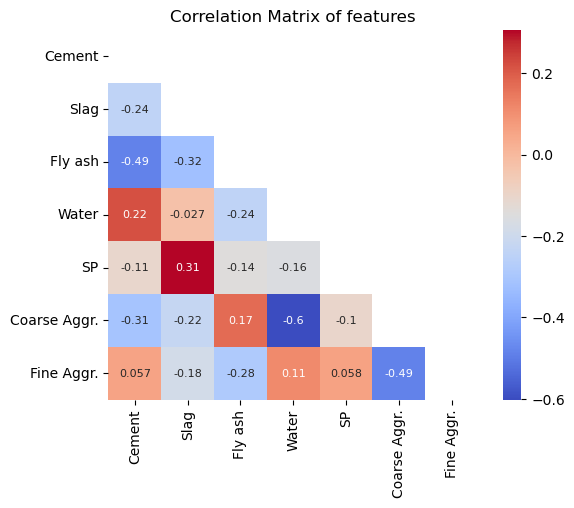

In [35]:
# Computing correlations between features
slump_feature_corr_matrix = slump_feature.corr()
slump_feature_mask = np.zeros_like(slump_feature_corr_matrix, dtype=np.bool)
slump_feature_mask[np.triu_indices_from(slump_feature_mask)] = True
slump_feature_heatmap = sns.heatmap(slump_feature_corr_matrix, mask=slump_feature_mask, annot=True, 
                                    cmap='coolwarm', square=True, annot_kws={"fontsize": 8})
slump_feature_heatmap.set_title("Correlation Matrix of features")
plt.show()

By investigating the correlation among features, it can help identifying are there any redundant features which may potentially lead to an overfitted model. In this case, we can see none of the features are strongly linear correlated to other features from the above. We consider there is no obvious redundant features having strong correlation with the others. 

We then further look into the correlation between features and the target variable to confirm redundancy. 

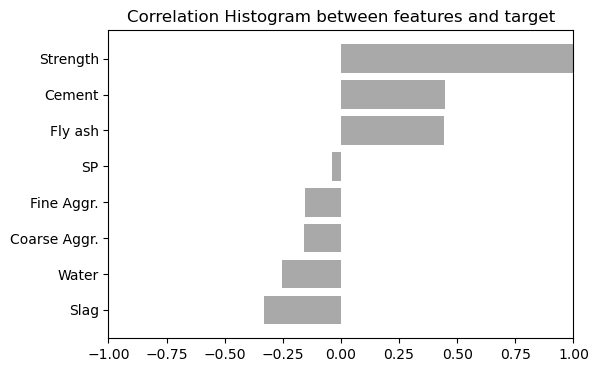

In [36]:
# Computing correlations between target and features
slump_corr_matrix = slump_clean.corr()
slump_target_corr = slump_corr_matrix.loc[:, "Strength"].sort_values(ascending=True)

# Plotting the correlation values in a bar chart
fig, ax = plt.subplots(figsize=(6,4))
ax.barh(slump_target_corr.index, slump_target_corr.values, color = "darkgrey")
ax.set_title("Correlation Histogram between features and target")
ax.set_xlim([-1, 1])
plt.show()

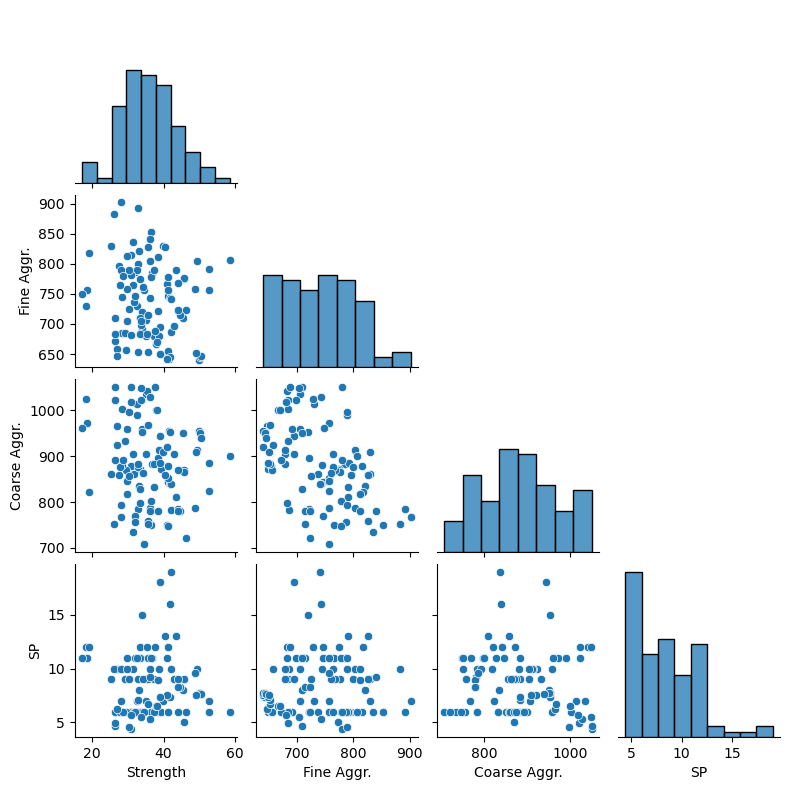

In [37]:
# Identifying any non-linear association which cannot captured by r for features having -0.2 < r < 0
uncorr_columns = ["Strength", "Fine Aggr.", "Coarse Aggr.", "SP"]
sns.pairplot(slump_clean[uncorr_columns], corner=True, diag_kind="hist", height=2, aspect=1)

From the above histogram, there is no single feature appears to be strongly correlated to the target variable, but somewhat having modorate correlation (more than +/- 0.3 away 0). However, there is one feature (SP) having correlation with the target to be so close to 0 (-0.0379), which suggests there is nearly no linear correlation with the target. 

It may be possible that there may be some non-linear correlation between them, so correlation coefficients cannot capture such associations. However, based on 1st column of the above pairplot on those weakly correlated feaures (within the range of 0.2 towards 0), it seems there are no obvious patterns noted between these features and target variable. We tend to believe there are weak or no association between them. Thus, we consider to drop these 3 features (Fine Aggr., Coarse Aggr. and SP) from our data.

For the purpose of this assignment, our analysis is limited to these features provided in the dataset. However, we understand that a regressor model will perform better with more accurate predictions if there are more correlated and informative features. Thus, a possible next step may be to research on any other confounding ingredients to the 28-days Compressive Strength of slump flow and collect more data on these correlated features in the dataset.

In [38]:
# Dropping the unassociated features
features_to_drop2 = ["SP", "Fine Aggr.", "Coarse Aggr."]
slump_final = slump_clean.drop(columns = features_to_drop2)

# Quick overview on the remaining features
slump_final.head(10)

,Cement,Slag,Fly ash,Water,Strength
0,273.0,82.0,105.0,210.0,34.99
1,163.0,149.0,191.0,180.0,41.14
2,162.0,148.0,191.0,179.0,41.81
3,162.0,148.0,190.0,179.0,42.08
4,154.0,112.0,144.0,220.0,26.82
5,147.0,89.0,115.0,202.0,25.21
6,152.0,139.0,178.0,168.0,38.86
7,145.0,0.0,227.0,240.0,36.59
8,152.0,0.0,237.0,204.0,32.71
9,304.0,0.0,140.0,214.0,38.46


## 2.3 Setting up a test set

In [39]:
# Randomly split the data into a training set (80%) and test set (20%) as required by the assignment
slump_x = slump_final.drop("Strength", axis =1)
slump_y = slump_final["Strength"].copy()

slump_train_x, slump_test_x, slump_train_y, slump_test_y = train_test_split(slump_x, slump_y, 
                                                                                    test_size=0.2, 
                                                                                    random_state=123)

## 2.4 Data Transformation

As we mentioned above in the data exploration, we had observed there are some features are having very different scales and outliers. Since certain Machine Learning algorithms do not perform well when numerical attributes have very different scales, we have to re-scale all the features to ensure same feature scale by normalisation or standardisation.

Since we had also noticed some of the attributes are right-skewed because of outliers in the previous section, we rescaled the features by standardisation as it is less affected by outliers than normalisation.

In [40]:
# Feature scaling
scaler = StandardScaler()

# Standardisation on attributes
slump_train_x = scaler.fit_transform(slump_train_x)
slump_test_x = scaler.transform(slump_test_x)

## 2.5 Training Regressions Models

### 2.5.1 Voting Regressor (default hyperparameters)

In [41]:
# Define the base estimators for the voting regressor
svm_regressor = SVR()
lr_regressor = LinearRegression()
sgd_regressor = SGDRegressor(random_state=123) #random state set since SGDRegressor involves randomness

# Define the voting regressor
voting_regressor = VotingRegressor(estimators=[('svm', svm_regressor), 
                                               ('lr', lr_regressor), 
                                               ('sgd', sgd_regressor)])

# Train the base estimators and Voting regressor
svm_regressor.fit(slump_train_x, slump_train_y)
lr_regressor.fit(slump_train_x, slump_train_y)
sgd_regressor.fit(slump_train_x, slump_train_y)
voting_regressor.fit(slump_train_x, slump_train_y)

# Predict the target variable for the test set using the base estimators and the voting regressor
svm_pred = svm_regressor.predict(slump_test_x)
lr_pred = lr_regressor.predict(slump_test_x)
sgd_pred = sgd_regressor.predict(slump_test_x)
voting_pred = voting_regressor.predict(slump_test_x)

# Calculate the RMSEs for the predictions
svm_rmse = np.sqrt(mean_squared_error(slump_test_y, svm_pred))
lr_rmse = np.sqrt(mean_squared_error(slump_test_y, lr_pred))
sgd_rmse = np.sqrt(mean_squared_error(slump_test_y, sgd_pred))
voting_rmse = np.sqrt(mean_squared_error(slump_test_y, voting_pred))

# Print the RMSEs
print("Test set RMSE:")
print('Linear SVM regressor:{:.4f}'.format(svm_rmse))
print('Linear regressor:{:.4f}'.format(lr_rmse))
print('SGD regressor:{:.4f}'.format(sgd_rmse))
print('Voting regressor:{:.4f}'.format(voting_rmse))

Test set RMSE:
Linear SVM regressor:4.1345
Linear regressor:2.9255
SGD regressor:2.8916
Voting regressor:2.5241


From the above, we can observe the ranking of the regressor performance in terms of test set RMSE is:

Voting regressor (2.5241) < SGD regressor (2.8916) < Linear regressor (2.9255) < Linear SVM regressor (4.1345)

Such ranking suggests voting regressor has fewest error in unseen data among all these regressors, whereas linear SVM regressor performs the poorest. Voting regressor often achieves a better performance (smaller error - RMSE) than all the base estimators in the ensemble owing to the law of large numbers. As for Linear SVM regressor, such large RMSE may because of a few predictions having large errors (since RMSE amplifies large residuals in predictions as it involves taking the square root of the mean of squared errors). We will further analyse these by plotting a graph illustrating the predicted values and ground truth for all regressors in the following.

We understand that there are other evaluation matrics, such as mean absolute error (MAE) and R-squared, may provide us the insight on the performance of the regressors. However, owing to the scope of this assignment, we are only required to compare the performance in RMSE. Hence, a possible step would be including more evaluation matrics to have a more comprehensive analysis on the performance on the models.

Moreover, when choosing the optimal maching learning model, computational complexity, processing time and resources budget may be one of the key consideration too.

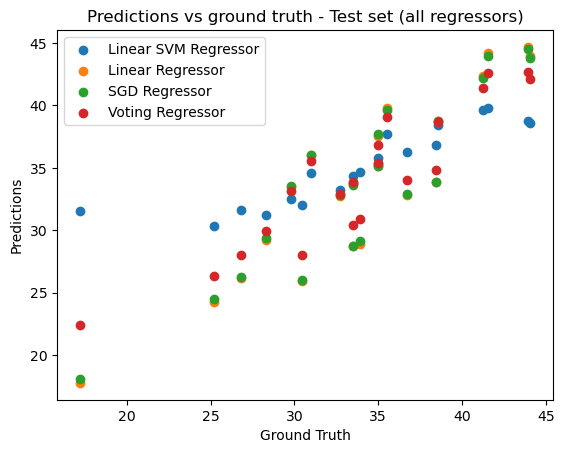

In [42]:
# Plot the predicted values versus the ground truth values of all the test instances
plt.scatter(slump_test_y, svm_pred, label='Linear SVM Regressor')
plt.scatter(slump_test_y, lr_pred, label='Linear Regressor')
plt.scatter(slump_test_y, sgd_pred, label='SGD Regressor')
plt.scatter(slump_test_y, voting_pred, label='Voting Regressor')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Predictions vs ground truth - Test set (all regressors)')
plt.legend()
plt.show()

From the above, we can observe:

(1) Linear SVM regressor 

- Actual Compressive Strength < 30: Linear SVM regressor generally predicts a greater Compress Strength value than the actual one. The residual when actual Compressive Strength about 17Mpa is significant (~20 Mpa).
- 30 < Actual Compressive Strength < 40: Linear SVM regressor predicts the actual values with minimal differnce.
- Actual Compressive Strength > 40: Linear SVM regressor generally predicts a smaller Compress Strength value (|residual| < 5Mpa)

(2) Linear regressor and SGD regressor - Similar patterns are noted for these 2 regressors

- Actual Compressive Strength < 30: Both regressors predict the actual values with minimal difference. 
- 30 < Actual Compressive Strength < 40: The predictions of both regressors fluctuate between 25 to 40, with larger residuals (approximately +/- 5) to the actual values.
- Actual Compressive Strength > 40: Both regressors predict the actual values with minimal difference.

Except for the prediction in the actual Compressive Strength ~17Mpa, Linear SVM regressor, Linear regressor and SGD regressor are having similar magnitudes of residuals in predictions. Thus, the relatively large Linear SVM regressor RMSE we observed in the above was mainly due to the error in predicting the actual Compressive Strength ~17Mpa.

(3) Voting regressor

- We can observe from the above plot, the Voting regressor predicted values are always in between Linear SVM regressor and Linear regressor and SGD regressor. However, they are more close to the predictions of Linear regressor and SGD regressor than Linear SVM regressor.

The reason for it is due to the Voting regressor aggregate the predictions of each base estimators and predict the Compressive Strength values by taking the average of the predictions in base estimators under soft voting approach. In sklearn VoringRegressor, it only uses soft voting approach and we considered to be reasonable in this part. Hard voting approach is inappropriate since we are predicting numerical variables in this case, it is quite hard for base estimators to predict the exact same value and the voting regressor to predict the value with the most votes. So, the Voting regressor predictions are closer to Linear regressor and SGD regressor because of 2 to 1 ratio.

The Voting regressor actually works best when the base estimators are as independent from one another as possible, so that it increases the chance that they will make very different types of erros and improving the ensembles' accuracy. However, from the above plot, we can see the predictions and the errors made by Linear regressor and SGD regressor are so similar. The reason for that is due to SGD regressor is somewhat a Linear Regressor but training with small batches of training data. Thus, the base estimators may not be diversed enough for the Voting regressor to predict more accurate values. Though the magnitude of residuals are generally smaller for Voting regressor, it cannot predict the values accurately. A possible next step is to include more diversed base estimators.

Beside for voting regressor, in default its predicted values are the average values of all the base estimators in the same weights. Better performance on the voting regressor may be obtained if we can assign different weightings on each base estimator, which the more confident one can have higher weighting. Owing to the scope of this assignment, we do not have to consider to add weightings to each base estimator, however, next possible step we may perform is to determine the confidence of base estimators' perdictions by referring to their training RMSE. The lower the RMSE indicates the higher the confidence of the prediction.

### 2.5.2  Voting regressor (tuning hyperparameters in base estimators)

In this section, we are required to tune a few hyperparameters in the base estimators and to compare the performance with the models in Secion 2.5.1. Thus, we will select some of the hyperparameters to experiment (2 per each base estimator) and search for the best values by Grid Search and 3-fold cross validation.

#### 2.5.2.1 Linear SVM regressor

In [43]:
# Define the RMSE scoring metric as a callable
def rmse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return sqrt(mse)

rmse_scorer = make_scorer(rmse, greater_is_better=False)

svm_regressor_gv = SVR()

# Define the grid of hyperparameters to search over
params_svm = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10, 100]}

# Perform grid search with 3-fold cross-validation
svm_grid_search = GridSearchCV(svm_regressor_gv, params_svm, cv=3, scoring=rmse_scorer)
svm_grid_search.fit(slump_train_x, slump_train_y)

# Print the best hyperparameters and RMSE score
print("Best hyperparameters: ", svm_grid_search.best_params_)
print("Best cross validation RMSE: {:.4f}".format(np.sqrt(-svm_grid_search.best_score_)))
svm_regressor_best = svm_grid_search.best_estimator_
svm_regressor_best.fit(slump_train_x, slump_train_y)
y_pred_svm_best = svm_regressor_best.predict(slump_test_x)
rmse_svm_best = np.sqrt(mean_squared_error(slump_test_y, y_pred_svm_best))
print("Test set RMSE for SVM regressor after tuning hyperparameters: {:.4f}".format(rmse_svm_best))

Best hyperparameters:  {'C': 100, 'epsilon': 1}
Best cross validation RMSE: 1.4870
Test set RMSE for SVM regressor after tuning hyperparameters: 1.8374


We have experiment to tune 2 hyperparameters in the Linear SVM regressor, (i) Regularisation strength hyperparameter (C) and (ii) Regularisation hyperparameter in width of margin (epsilon). 

In Linear SVM regressor, C controls the regularisation strength. Increasing balance of C will decrease the regularisation strength, increase models' variance and reduce the bias, which may lead to overfitting. We will experimeter the C with 0.01, 0.1, 1, 10 and 100, which represent 5 different degrees of regularisation strength respectively. While as for the regularisation hyperparameter epsilon determines the width of margin. The larger the epsilon, the wider the street and more generalised of the model. We will experimeter the epsilon with 0.01, 0.1, 1, 10 and 100, which represent 5 different degrees of regularisation respectively, to determine the optimal value.

In order to determine the optimal combination of hyperparameter to obtain the lowest RMSE, we have used grid search and 3-fold cross validation. From the above, we can observe the combination of having C = 100 and epsilon = 1 gives us the minimal RMSE (1.4870). In this combination of hyperparameter, we are expecting a moderate size of sheet with strong strength of regularisation. We then used this combination of hyperparameters to train our Voting regressor as follows.

Moreover, the test set RMSE after tuning hyperparameters is 1.8374 which is much smaller than the default one (4.1345). It suggests the regressor performs better after tuning to the optimal conbination of hyperparameters. This may due to the correction on the large error made on predicting the actual Compressive Strength ~ 17Mpa in the above. We can further confirm this in the prediction vs grand truth plot in the following.

#### 2.5.2.2 Linear regressor

In [44]:
lin_regressor_gv = LinearRegression()

# Define the grid of hyperparameters to search over
params_lr = {'fit_intercept' : [True, False]}

# Perform grid search with 3-fold cross-validation
lr_grid_search = GridSearchCV(lin_regressor_gv, params_lr, cv=3, scoring=rmse_scorer)
lr_grid_search.fit(slump_train_x, slump_train_y)

# Print the best hyperparameters and RMSE score
print("Best hyperparameters: ", lr_grid_search.best_params_)
print("Best cross validation RMSE: {:.4f}".format(np.sqrt(-lr_grid_search.best_score_)))
lin_regressor_best = lr_grid_search.best_estimator_
lin_regressor_best.fit(slump_train_x, slump_train_y)
y_pred_lr_best = lin_regressor_best.predict(slump_test_x)
rmse_lr_best = np.sqrt(mean_squared_error(slump_test_y, y_pred_lr_best))
print("Test Set RMSE for linear regressor after tuning hyperparameters: {:.4f}".format(rmse_lr_best))

Best hyperparameters:  {'fit_intercept': True}
Best cross validation RMSE: 1.7391
Test Set RMSE for linear regressor after tuning hyperparameters: 2.9255


There are no hyperparameters in sklearn LinearRegression( ), but having some parameters we can try to adjust, such as fit_intercept. We do not believe such tuning hyperparameters will have significant help in improving the performance in the Linear regressor. From the result of the grid search, we can see the better option for parameter 'fit_intercept' is to fitting the y-intercept as well, giving the best cross validation RMSE to be 1.7391 and the test set RMSE is 2.9255 (which is the same as before tuning).

For the regularisation hyperparameters which are commonly used in linear regression, such as Ridge regression, Lasso regressino and Elastic Net, can be tuned if we are applying sklearn SGDRegressor( ), as shown in the next section. 

#### 2.5.2.3 SGD regressor

In [45]:
sgd_regressor_gv = SGDRegressor(random_state=123)

# Define the grid of hyperparameters to search over
param_grid_sgd = {'alpha': [0.001, 0.01, 0.1, 1 , 100],
                  'penalty': ['l1', 'l2', 'elasticnet', None]
                 }

# Perform grid search with 3-fold cross-validation
sgd_grid_search = GridSearchCV(sgd_regressor_gv, param_grid_sgd, cv=3, scoring=rmse_scorer)
sgd_grid_search.fit(slump_train_x, slump_train_y)

# Print the best hyperparameters and RMSE score
print("Best hyperparameters: ", sgd_grid_search.best_params_)
print("Best cross validation RMSE: {:.4f}".format(np.sqrt(-sgd_grid_search.best_score_)))
sgd_regressor_best = sgd_grid_search.best_estimator_
sgd_regressor_best.fit(slump_train_x, slump_train_y)
y_pred_sgd_best = sgd_regressor_best.predict(slump_test_x)
rmse_sgd_best = np.sqrt(mean_squared_error(slump_test_y, y_pred_sgd_best))
print("Test set RMSE for SGD regressor after tuning hyperparameters: {:.4f}".format(rmse_sgd_best))                        

Best hyperparameters:  {'alpha': 0.001, 'penalty': 'l2'}
Best cross validation RMSE: 1.7443
Test set RMSE for SGD regressor after tuning hyperparameters: 2.8871


We have experimented in tuning 2 hyperparmeteres in the SGD regressor, (i) weighting on regularisation term (alpha) and (ii) regularisation term (penalty). 

In SGD regressor, the alpha hyperparameter controls the weight on the regularization term, which is used to prevent overfitting by penalising large coefficient values. Increasing alpha makes the regularisation term with greater weighting to the regressor, and thus becomes more generalised. As for penalty, it specifies the type of regularisation to be added in the regressor (Lasso (l1), Ridge (l2), Elastic Net or none of these). Lasso regularisation tends to completely elminate the weights of the least important features by adding an absolute value of the sum of the coefficients to the cost function being minimized, whereas Ridge regularisation forces the learning algorithm not only fitting the data but also keeping the model weights as small as possible by adding a squared sum of the coefficients. Elastic Net regularization is a combination of both Lasso and Ridge regularisation. It adds both the absolute value of the sum of the coefficients and the squared sum of the coefficients to the cost function being minimised. 

In order to determine the optimal combination of hyperparameter to obtain the lowest RMSE, we have used grid search and 3-fold cross validation. From the above, we can observe the combination of having alpha = 0.001 and penalty = l2 gives us the minimal cross-validated RMSE (1.7443). In this combination of hyperparameter, we are expecting a Ridge regularisation term with a weighting of 0.001 in the SGD regressor. We then used this combination of hyperparameters to train our Voting regressor as follows.

Moreover, the test set RMSE after tuning hyperparameters is 2.8871, which is a bit smaller than the default one (2.8916). It suggests the regressor performs a little better after tuning to the optimal combination of hyperparameters.

Further improvement in performance may be achieved by tuning more hyperparameters, such as learning_rate, initial learning rate (eta0) and warm_start. However, for the purpose of this Assignment, we chose to tune the above 2 hyperparameters only.

#### 2.5.2.4 Voting regressor

In [46]:
voting_regressor_best = VotingRegressor(estimators=[('svm_best', svm_regressor_best), 
                                                   ('lr_best', lin_regressor_best), 
                                                   ('sgd_best', sgd_regressor_best)])
voting_regressor_best.fit(slump_train_x, slump_train_y)

VotingRegressor(estimators=[('svm_best', SVR(C=100, epsilon=1)),
                            ('lr_best', LinearRegression()),
                            ('sgd_best',
                             SGDRegressor(alpha=0.001, random_state=123))])

#### 2.5.2.5 Performance Measures

In [47]:
y_pred_voting_best = voting_regressor_best.predict(slump_test_x)
rmse_voting_best = np.sqrt(mean_squared_error(slump_test_y, y_pred_voting_best))

print("Test set RMSE after tuning hyperparameters:")
print("SVM regressor: {:.4f}".format(rmse_svm_best))
print("Linear regressor: {:.4f}".format(rmse_lr_best))
print("SGD regressor:{:.4f}".format(rmse_sgd_best))  
print("Voting regressor: {:.4f}".format(rmse_voting_best))    

Test set RMSE after tuning hyperparameters:
SVM regressor: 1.8374
Linear regressor: 2.9255
SGD regressor:2.8871
Voting regressor: 2.3340


From the above, we can observe the test set RMSE in all the regressors after tuning to the hyperparameters have decreased (except Linear regressor with no hyperparameters), which indicates there are smaller magnitude of errors made in the prediction of Compressive Strength.

The ranking of the regressor performance in terms of test set RMSE is:

Linear SVM regressor (1.8374) < Voting regressor (2.3340) < SGD regressor (2.8871) < Linear regressor (2.9255)

After tuning to the best hyperparameters in base estimators, it seems that Linear SVM regressor made the smallest magnitude of error in its prediction, following by the Voting regressor and the Linear regressor made the greatest magnitude of error. However, in general, all the models appear to perform reasonably satisfactory with small RMSE (< 3).

The test set RMSE in Voting regressor is not smallest, even though we believe Voting regressor will generally perform better than its base estimators, may due to the heavier weighting in 2 similar base estimators here (SGD regressor and Linear regressor). The Voting regressor has more bias to them, when Linear SVM regressor holding an opposite prediction.

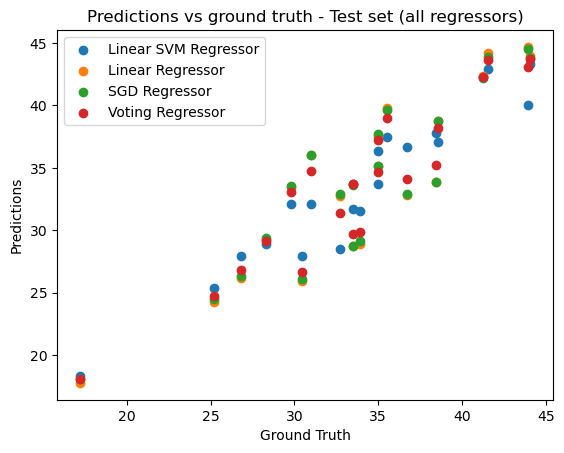

In [48]:
# Plot the predicted values versus the ground truth values of all the test instances
plt.scatter(slump_test_y, y_pred_svm_best, label='Linear SVM Regressor')
plt.scatter(slump_test_y, y_pred_lr_best, label='Linear Regressor')
plt.scatter(slump_test_y, y_pred_sgd_best, label='SGD Regressor')
plt.scatter(slump_test_y, y_pred_voting_best, label='Voting Regressor')
plt.title('Predictions vs ground truth - Test set (all regressors)')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.legend()
plt.show()

However, we can see the predictions are more accurate now for all the models in general (points are more close to the diagonal of the above plot). 

As aforementioned, SGD regressor and Linear regressor are having similar predictions for all the value, which indicate they may not be independent enough to provide different information to Voting regressor to make better predictions. Other independent algorithms, such as k-NN regressor may be applied to be the base estimators to replace one of them. However, owing to the scope of this assignment, we are only required to consider base estimators in (i) Linear SVM regressor, (ii) Linear regressor and (iii) SGD regressor, we did not consider more base estimators. Hence, a possible next step could include tuning more hyperparameters and more diversed algorithms as base estimators and compare the performance again.

# Part 3 - Abalone dataset

In Part 3 of this assignment, the dataset analysed is Abalone dataset, which can be obtained from the UCI Machine Learning website (https://archive.ics.uci.edu/ml/datasets/Abalone).

The dataset contains information on different characteristics of abalone and their corresponding number of rings exist. The dataset analysed covers in total 4177 observations. 

In this part, we aim to train some Decision Tree Regressors with different hyperparameters and ensemble them into a Random Forest regressor with 500 individual Decision Tree Regressors to predict the number of rings in the abalone. After that, we will also explore a Bagging regressor with 500 SVM regressors and comparing its performance to the Random Forest regressor.

## 3.1 Data loading and overview

### 3.1.1 Loading the dataset

In [49]:
# Load data into Jupyter notebook

# We have to set the header first since the dataset does not contain headers
abalone_headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
                    'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

abalone = pd.read_csv("abalone.data", names = abalone_headers)

### 3.2 Quick overview on the dataset

In [50]:
# Check the dimensions of the dataset
print("Number of rows:", abalone.shape[0])
print("Number of columns:", abalone.shape[1])

# Quick overview on the first 10 instances using head()
abalone.head(10)

Number of rows: 4177
Number of columns: 9


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [51]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


By looking at the dimension of the dataset, we can see there are in total 4177 instances and 9 columns, i.e. 8 features and target variable (Rings).

From the first glance on the dataset, we can observe:

- target variable (Rings): Total number of rings on the abalones (numerical)

- 1 categorical qualitative feature (Sex): there are 3 groups we noted in the categorical variable - (i) male ("M"), (ii) female ("F") and (iii) infant ("I")

- 7 numberical features: they are the measurements on the size (Length, Diameter and Height) and weight (Whole weight, Shucked weight, Viscera weight and Shell weight) of the abalones.

Besides, in terms of data completeness, there are no missing values for all the columns. However, we may further look at the distributions of each feature to determine are there any existance of invalid input in later stage, such as outliers and unreasonable values, which may require further treatment in data preparation for model training.

## 3.2 Data Exploration and Visualisation

### 3.2.1 Target variables

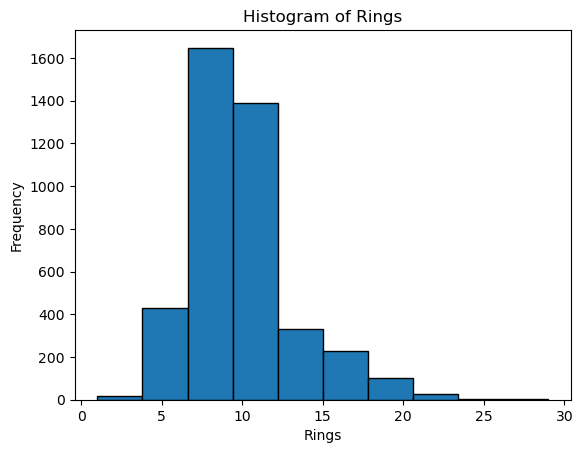

In [52]:
# Plot histogram of "Rings" variable
plt.hist(abalone["Rings"], edgecolor = "black")
plt.xlabel("Rings")
plt.ylabel("Frequency")
plt.title("Histogram of Rings")
plt.show()

From the histogram of the target variable, we can see the distribution is slightly right-skewed. There are only few instances having number of rings greater than 15. Such imbalance issue may affect the performance of the models, we will further investigate its impact in later stage.

### 3.2.2 Categorical features

From the above preliminary overview of the dataset, we have noted that there is one categorical feature. Since most of the Machine Learning algorithms prefer to work with numbers, we will convert the qualitative categorical variable (Sex) from text to numbers: "M" = 0, "F" = 1 and "I" = 2.

In [53]:
# Define the custom mapping
sex_mapping = {'M': 0, 'F': 1, 'I': 2}
# Map the "Sex" column in the input data to the custom numbers
sex_col = abalone[["Sex"]]
sex_num = sex_col["Sex"].map(sex_mapping)
# Add the encoded column to the input data
abalone["Sex_num"] = sex_num
# Drop the categorical sex column
abalone_num = abalone.drop("Sex", axis = 1)

### 3.2.3 Numerical features

In [54]:
non_num_features = ["Sex_num", "Rings"]
abalone_num_feature = abalone_num.drop(columns = non_num_features)
abalone_num_feature.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


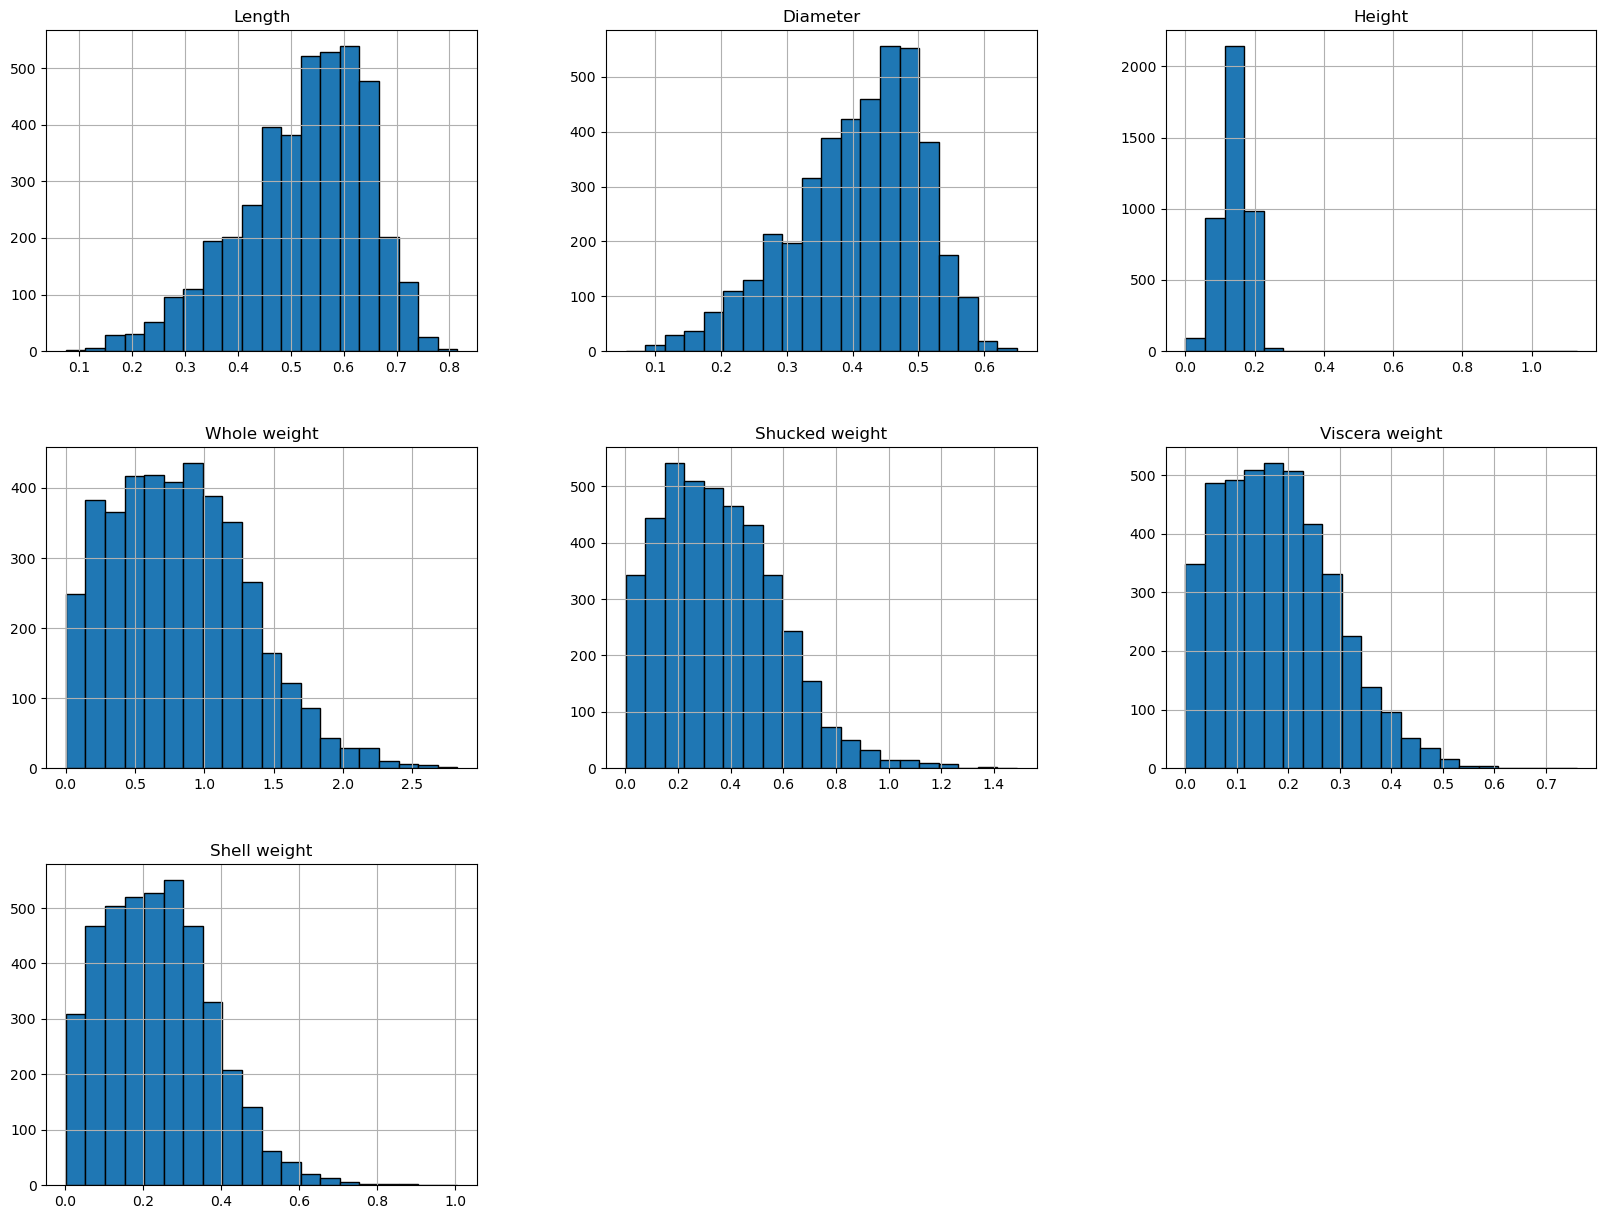

In [55]:
abalone_num_feature.hist(bins=20, figsize=(20,15), edgecolor = "black")
plt.show()

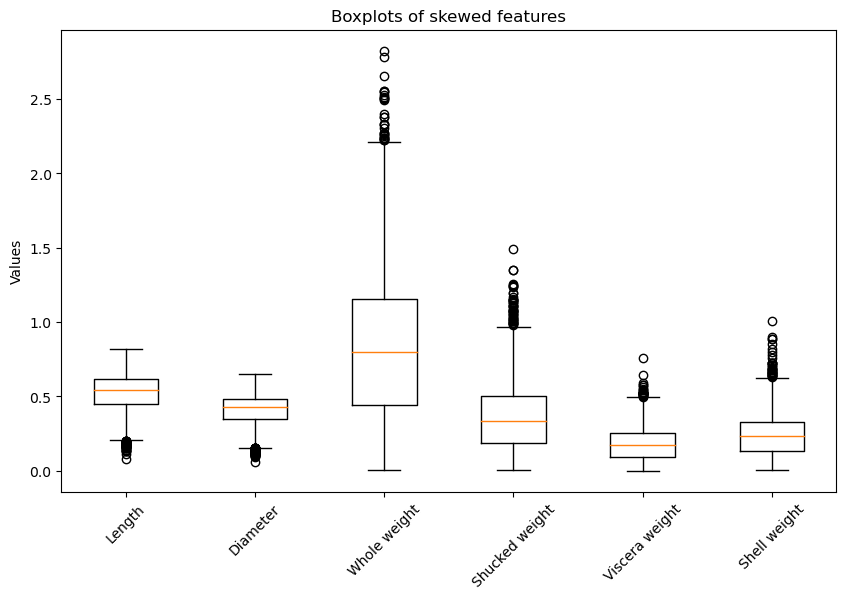

In [56]:
fig_box, ax_box = plt.subplots(figsize=(10, 6))
skewed_cols = ["Length", "Diameter", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight"]

# Set the box properties, including the color
boxprops = dict(linestyle='-', linewidth=1)
ax_box.boxplot(abalone_num[skewed_cols], boxprops=boxprops)

ax_box.set_title("Boxplots of skewed features")
ax_box.set_xticklabels(skewed_cols, rotation=45)
ax_box.set_ylabel("Values")
ax_box.grid(False)
plt.show()

From the above, the numberical variables seem to be having similar scales (the ranges observed from the above descriptive statistic table and x-axis of histograms). However, the distribution of some features are appeared to be left-skewed (Length and Diameter) or right skewed (features related to weight) owing to the existance of outliers (which is confirmed by the above boxplot as well).

Though Decision Tree regressor is not sensitive to outliers; however, we will also train SVM regressor as our base estimators of Bagging regressor, which is sensitive to outliers, in our Bagging regressor in later stage too. Thus, we consider to standardise the features before training the model to reduce a bit on the impacts from outliers. We understand there are more ways to mitigate the impact from outliers, such as dropping all the instances containing outliers. However, since the outliers are not contributing large proportion of the total instance, we consider it is reasonable to keep them in the dataset and using standardisation to reduce a bit the impact in this case.

### 3.2.4 Correlations

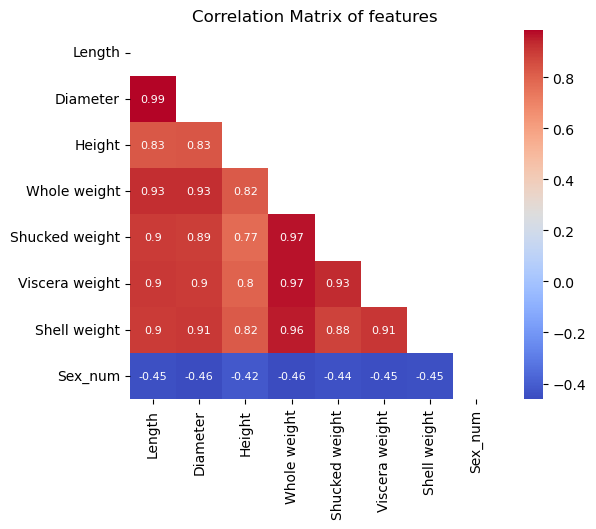

In [57]:
# Computing correlations between features
abalone_feature = abalone_num.drop("Rings", axis = 1)
abalone_feature_corr_matrix = abalone_feature.corr()
abalone_feature_mask = np.zeros_like(abalone_feature_corr_matrix, dtype=np.bool)
abalone_feature_mask[np.triu_indices_from(abalone_feature_mask)] = True
abalone_feature_heatmap = sns.heatmap(abalone_feature_corr_matrix, mask=abalone_feature_mask, annot=True, 
                                    cmap='coolwarm', square=True, annot_kws={"fontsize": 8})
abalone_feature_heatmap.set_title("Correlation Matrix of features")
plt.show()

By investigating the correlation among features, it can help identifying are there any redundant features which may potentially lead to an overfitted model. In this case, we can see most of the features are strongly linear correlated to other features from the above (correlation coefficients > 0.8), except for Sex. This indicate there are redundant features, which shall be removed from the model training. However, for the purpose of this Assignment, we will be looking at the feature selection (dropping non-important features) carried out by Random Forest Regressors in Section 3.5.3.2, thus we will not drop any redundant features in this stage.

In [58]:
# Computing correlations between target and features
abalone_corr_matrix = abalone_num.corr()
abalone_corr_matrix["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex_num          -0.351822
Name: Rings, dtype: float64

Based on the above correlation matrix, we can notice most of the features are having moderate correlation with the target (Rings). Thus, we consider the data are reasonable to process.

## 3.3 Setting up a test set

In [59]:
# Randomly split the data into a training set (85%) and test set (15%)
abalone_x = abalone_num.drop("Rings", axis =1)
abalone_y = abalone_num["Rings"].copy()

abalone_train_x, abalone_test_x, abalone_train_y, abalone_test_y = train_test_split(abalone_x, abalone_y, 
                                                                                    test_size=0.15, 
                                                                                    random_state=91)

## 3.4 Data Transformation

As we mentioned above in the data exploration, we had observed there are some outlers. Since SVM regressor is sensitive to outliers, we standardise all the features as follows to reduce the impact.

In [60]:
# Feature scaling
abalone_scaler = StandardScaler()

# Standardisation on attributes
abalone_train_x = abalone_scaler.fit_transform(abalone_train_x)
abalone_test_x = abalone_scaler.transform(abalone_test_x)

## 3.5 Training Regression models

### 3.5.1 Decision Tree Regressor (tuning max_depth)

In this part, we will train a Decision Tree Regressor by tuning one of its regularisation hyperparameters, max_depth, while keeping others as default. 

This regularisation hyperparameter (max_depth) controls the depth of the Decision Tree Regressor, the tree has to be stopped once it reached the condition set by hyperparameter. This allows it performs better in unseen data by trading part of the learning from training data (lower variance with higher bias). The larger the balance of max_depth, the more generalised the model will be.

Best max_depth:  5
Corresponding CV RMSE: 2.4013


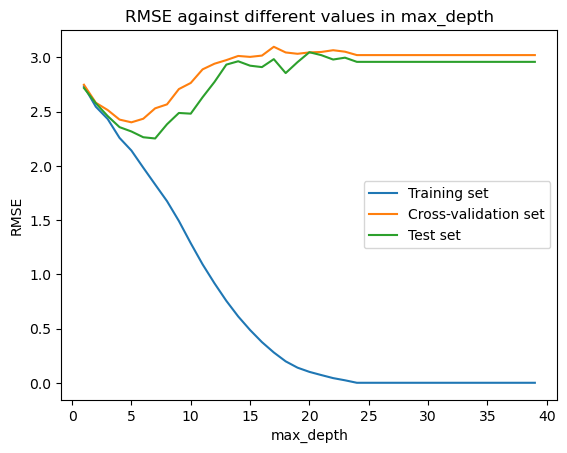

In [61]:
abalone_dtr = DecisionTreeRegressor(random_state=91)

# Define the range of values for the max_depth hyperparameter to test
dtr_max_depth = range(1,40) # 40 ~1% of the total instance

# Perform 3-fold cross-validation for each max_depth value in the range
train_scores, cv_scores, test_scores = [], [], []

for max_depth in dtr_max_depth:
    abalone_dtr.set_params(max_depth=max_depth)
    scores = cross_validate(abalone_dtr, abalone_train_x, abalone_train_y, 
                            cv=3, scoring='neg_mean_squared_error', return_train_score=True)
    train_scores.append(np.sqrt(-scores['train_score'].mean()))
    cv_scores.append(np.sqrt(-scores['test_score'].mean()))
    abalone_dtr.fit(abalone_train_x, abalone_train_y)
    y_pred_dtr = abalone_dtr.predict(abalone_test_x)
    y_pred_dtr = np.round(y_pred_dtr)
    test_scores.append(np.sqrt(((abalone_test_y - y_pred_dtr) ** 2).mean()))
    
# Find the index of the minimum cv score and corresponding max depth
min_cv_score_idx = np.argmin(cv_scores)
best_max_depth = dtr_max_depth[min_cv_score_idx]
best_cv_score = cv_scores[min_cv_score_idx]

print("Best max_depth: ", best_max_depth)
print("Corresponding CV RMSE: {:.4f}".format(best_cv_score))
    
# Plot the training, cross-validation and test errors as a function of max_depth
plt.plot(dtr_max_depth, train_scores, label='Training set')
plt.plot(dtr_max_depth, cv_scores, label='Cross-validation set')
plt.plot(dtr_max_depth, test_scores, label='Test set')
plt.title("RMSE against different values in max_depth")
plt.legend()
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.show()

From the above plot, we can observe:

Training set: RMSE drops drastically with the increasing max_depth, and it reaches zero when the max_depth is over 25. Such decreasing trend is mainly due to the Decision Tree Regressor is overfitting and learning better on the training data with more depth is allowed (increase in variance and decrease in bias).

Cross-validation set: RMSE initially decreases when max_depth increases from 0 to 5. However, it bounds to 3.0 gradually afterwards. Such trend suggests that the performance of the model in predicting unseen data deteriorate after max_depth = 5.

Test set: RMSE has similar trend as cross-validation set, but with a bit lower RMSE and more fluctuating throughout the range. The difference may occur by chance (different split of data on test set and cross-validation sets). Cross-validation RMSE is generally considered to be more accurate since it is the average RMSE from the 3-fold cross validation test. And the fluctuating test set RMSE indiates the performance is less consistent than the other two.

Huge gap is noted between training set (known data), and cross-validation set and test set (unseen data) when max_depth > 5. It indicates the model is overfitting and the overfit issue deteroried when the increasing max_depth until the training RMSE = 0.

When we decide the optimal value of a hyperparameter, we usually look at the cross validation set. In this case, we will search for the lowest cross validation RMSE. Based on the cross-validation RMSE trend, we believe the model will work the best in the balance of generalisation and variance when max_depth hyperparameter is set to be 5, with a CV RMSE to be 2.4013.

### 3.5.2 Decision Tree Regressor (tuning min_samples_leaf, max_depth = 5)

In this part, we are tuning one more regularisation hyperparameter (min_samples_leaf) in the Decision Tree Regressor on top of the optimal max_depth we found in previous section.

The min_samples_leaf regularisation hyperparameter controls the minimum number of samples included in a leaf node, the node has to stop splitting to fulfil the condition set by hyperparameter. This allows it performs better in unseen data by trading part of the learning from training data (lower variance with higher bias). Thus, fewer splits are noted in the decision tree regressor and the leaf nodes may have larger sample size and gini impurities.

In this case, since we are having a relatively large dataset with 3550 training instance, we are trying to search for the optimal min_samples_leaf value by testing from 2 samples to 150 (about 5% of total instance).

Best min_samples_leaf:  18
Corresponding CV RMSE: 2.3502


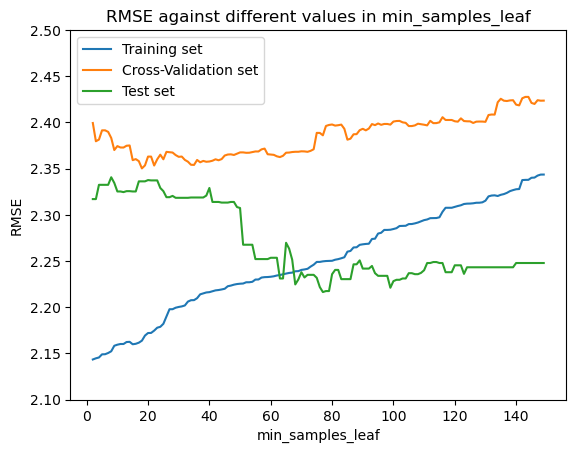

In [62]:
abalone_dtr2 = DecisionTreeRegressor(random_state=91, max_depth=5)

# Define the range of min_samples_leaf values to try
dtr_min_samples_leaf = range(2, 150) # 150 (~5% of total instance)

# Perform 3-fold cross-validation for each min_samples_leaf value in the range
train_scores2, cv_scores2, test_scores2 = [], [], []

for min_samples_leaf in dtr_min_samples_leaf:
    abalone_dtr2.set_params(min_samples_leaf=min_samples_leaf)
    scores2 = cross_validate(abalone_dtr2, abalone_train_x, abalone_train_y, cv=3, 
                            scoring='neg_mean_squared_error', return_train_score=True)
    train_scores2.append(np.sqrt(-scores2['train_score'].mean()))
    cv_scores2.append(np.sqrt(-scores2['test_score'].mean()))
    abalone_dtr2.fit(abalone_train_x, abalone_train_y)
    y_pred_dtr2 = abalone_dtr2.predict(abalone_test_x)
    y_pred_dtr2 = np.round(y_pred_dtr2)
    test_scores2.append(np.sqrt(((abalone_test_y - y_pred_dtr2) ** 2).mean()))
    
# Find the index of the minimum cv score and corresponding max depth
min_cv_score2_idx = np.argmin(cv_scores2)
best_min_sameples_leaf = dtr_min_samples_leaf[min_cv_score2_idx]
best_cv_score2 = cv_scores2[min_cv_score2_idx]

print("Best min_samples_leaf: ", best_min_sameples_leaf)
print("Corresponding CV RMSE: {:.4f}".format(best_cv_score2))

# Plot the training, cross-validation, and test scores as a function of min_samples_leaf
plt.plot(dtr_min_samples_leaf, train_scores2, label='Training set')
plt.plot(dtr_min_samples_leaf, cv_scores2, label='Cross-Validation set')
plt.plot(dtr_min_samples_leaf, test_scores2, label='Test set')
plt.title("RMSE against different values in min_samples_leaf")
plt.xlabel('min_samples_leaf')
plt.ylabel('RMSE')
plt.ylim(2.1, 2.5)
plt.legend()
plt.show()

From the above plot, we can observe:

Training set: RMSE increases with the increasing min_samples_leaf since the model is more generalised by loosing the restriction on the minimum size of the leaf nodes (reduce variance and increase in bias). In order to be more generalised, the model has to trade off part of the training data learning.

Cross-validation set: RMSE initially decreases when min_samples_leaf increases from 2 to 18. However, an increasing trend is noted when min_samples_leaf is greater than 18. Such trend suggests that the performance of the model in predicting unseen data start deteriorating after min_samples_leaf = 18, which may be an indication of overfitting.

Test set: It seems the test set RMSE trend is the most fluctuating among all 3 data sets, which indicates its performance is not quite promising. Overall, we can see a decreasing trend of the test set RMSE with increasing min_samples_leaf. One possible reason may be the model preforms better in unseen data as it is more generalised with larger min_samples_leaf. Another possible reason is the good performance is by chance. Thus, in order to confirm the performance on the unseen data, we will look at the k-fold cross validation set, which provides us average RMSE in k-fold. In this case, we performed a 3-fold cross validation set and we can see the model does not perform as good as the test set RMSE shown. A more accurate result may be obtained if performing a cross validation test with more folds.

When we decide the optimal value of a hyperparameter, we usually look at the cross validation set. In this case, we will search for the lowest cross validation RMSE. Based on the cross-validation RMSE trend, we believe the model will work the best in the balance of bias and variance when min_samples_leaf hyperparameter is set to be 18 (on top of max_depth = 5), with a CV RMSE to be 2.3502.

One more thing we can notice is that the CV RMSE for min_samples_leaf = 18 and max_depth = 5 of 2.3502 is smaller than the one just considering max_depth = 5 of 2.4013. This suggests that the model performs better when we tuning both hyperparameters than just one.

### 3.5.3 Random Forest Regressor

#### 3.5.3.1 Training a Full model

In this section, we will train a Random Forest regressor with 500 Decision Tree regressors. Moreover, we will further explore its performance by experimenting a number of hyperparameters.

RandomForestRegressor has all the hyperparameters of a DecisionTreeRegressor (to control how trees are grown), plus all the hyperparameteres of a BaggingRegressor to control the ensemble itself. In this assignment, we will experiment on 2 hyperparameters, (i) max_features and (ii) max_samples, on top of the 2 hyperparameters we have analysed in Section 3.4.2 (max_depth = 5 and min_samples_leaf = 18). 

- max_features: 

This hyperparameter controls the maximum number of features that applied to be considered when spliting each tree in the Random Forest regressor. Since the Random Forest alogrithm introduce extra randomness when growing trees, it searches for the best feature among a random subset of features, instead of searching the best from all the available features. Increasing max_features indicates more features are used to grow trees, increasing the variance of the model and may lead to overfitting.

In this case, since we only have 8 features in this dataset, we will experiment all values from 1-8 for searching the optimal max_features in the grid search.

- max_samples:

This hyperparameter controls the maximum number of samples to be used for growing each tree in the Random Forest regressor. The range of max_samples is from 0 to 1, representing the portion of total training data to be used. Increasing the maximum number of samples will reduce the gerenalisation of the model and may lead to overfitting.

In this case, we consider 0.5 (growing trees with random subet of 50% of training data) is a reasonable starting point to final the optimal value, and so on experimenting 0.8 and 1.0.

In [63]:
abalone_rf_reg = RandomForestRegressor(random_state=91)

# Experiment for other hyperparameters for different values
rf_param_grid = {
    'n_estimators': [500],  # no. of trees
    'max_depth': [5],
    'min_samples_leaf': [18],
    'max_features': list(range(1,8)),
    'max_samples': [0.5, 0.8, 1.0]
}

# Perform grid search with 3-fold cross validation to find optimal hyperparameters combinations
grid_search_rf = GridSearchCV(abalone_rf_reg, rf_param_grid, cv=3, scoring=rmse_scorer, 
                              n_jobs=-1, verbose=2)

# Fit the grid search object to the training data
grid_search_rf.fit(abalone_train_x, abalone_train_y)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search_rf.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
Best hyperparameters: {'max_depth': 5, 'max_features': 7, 'max_samples': 1.0, 'min_samples_leaf': 18, 'n_estimators': 500}


From the above, the best combination of hyperparameters for training a Random Forest Regressor is:

- n_estimator = 500: Ensemble 500 trees
- max_depth = 5: Each tree will not have more than 5 level splits
- min_samples_leaf = 18: Leaf nodes will have at least 18 samples
- max_features = 7: Maximum 7 features will be used to split the tree
- max_samples = 1.0: All training data are used to build each tree

We will then train a Random Forest Regressor based on the best combination of hyperparameters.

In [64]:
# Train a random forest regressor using the best hyperparameters found
abalone_rf_reg_best = grid_search_rf.best_estimator_
abalone_rf_reg_best.fit(abalone_train_x, abalone_train_y)

# Predict the test set using the best random forest regressor
y_pred_rf = abalone_rf_reg_best.predict(abalone_test_x)
y_pred_rf = np.round(y_pred_rf) # Round the predictions to the nearest integer

# Compute the RMSE of the predictions on the test set
rmse_rf = np.sqrt(mean_squared_error(abalone_test_y, y_pred_rf))
print("Random Forest Regressor Test set RMSE: {:.4f}".format(rmse_rf))

Random Forest Regressor Test set RMSE: 2.1406


Using the best combination of hyperparameters, the trained Random Forest Regressor has a test set RMSE to be 2.1406, which is lower than that of Decision Tree regressor (max_depth = 5) of 2.4013 and Decision Tree regressor (max_depth = 5 and min_samples_leaf = 18) of 2.3502. This indicates the Random Forest Regressor performs better than the individual Decision Tree regressors.

Random Forest Regressors generally perform better than individual Decision Tree regressors is mainly attributed by greater tree diversity, which trade a higer bias for a lower variance. Moreover, ensembling a number of Decision Tree regressors in Random Forest Regressors reduces the individual tree overfitting problem by averaging the predictions of multiple trees, and thus results in a better performance.

#### 3.5.3.2 Feature selections

Another advantage of Random Forest regressor is it make it easy to measure the relative important of each feature. Features are considered to be more important if they can reduce greater amount of impurity on average (across all the trees in the random forest). The importance of the features is measured by the feature importance score, which is the weighted average of the impurity reduction scores of the nodes where the feature is used for splitting, across all the trees in the random forest. The higher the feature importance score, the more powerful in reducing the impurity and treated as more important features. Aggregate of feature important scores for all features should be 1.

In this section, we will trim the feature dimension of the data in the Random Forest Regressor by setting a threshold of 5% as required in the assignment. Features will be considered to be important and be kept in the model training if their importance values are above 5%. Higher threshold may be considered if 0.05 is unable to select the important features from the model, such as most of the features are having important scores greater than 0.05, or we would like to filter only the features are significantly important.

In [65]:
# Create a SelectFromModel object to remove features with importance values below 0.05
selector = SelectFromModel(abalone_rf_reg_best, threshold=0.05, prefit=True)

# Transform the training and test data to retain only the selected features
abalone_train_x_reduced = selector.transform(abalone_train_x)
abalone_test_x_reduced = selector.transform(abalone_test_x)

# Print the names of the retained features
feature_names = abalone_num.columns[:-1][selector.get_support()]
print('Selected features:')

importance_scores = abalone_rf_reg_best.feature_importances_[selector.get_support()]
for feature, score in zip(feature_names, importance_scores):
    print('{:15} Importance Score: {:.4f}'.format(feature, score))

# Print the total feature importance value that is retained after dimension reduction
total_importance = np.sum(abalone_rf_reg_best.feature_importances_[selector.get_support()])
print('\nTotal feature importance: {:.4f}'.format(total_importance))

Selected features:
Height          Importance Score: 0.0653
Shucked weight  Importance Score: 0.1210
Shell weight    Importance Score: 0.7161

Total feature importance: 0.9023


Based on the above result, there are only 3 important features remain, i.e. (i) Height, (ii) Shucked weight and (iii) Shell weight, with feature importance source of 0.0653, 0.1210 and 0.7161 respectively. Thus, there are in total 0.9023 feature importance value is retained after the dimension reduction step, which is considered to be significant to the model. 

There are 5 features, which are Length, Diameter, Whole weight, Viscera weight and Sex_num, are removed. We consider this is consistent to our observation in previous data visualisation. In Section 3.2.4, we have found that most of the features are strongly linear correlated to the other features, which suggest actually there are some redundant features in the dataset. For instance, Height, Length and Diameter are all related to the size of an abalone. Keeping one of them is considered to be sufficient in analysing the effect of size towards the number of rings in an abalone. While Whole weight, Shucked weight, Viscera weight and Shell weight are describing the weight of different part of an abalone, only keeping Shucked weight (weight without shell) and Shell weight are considered to be reasonable since they are the most representative features to weights.

We will train a Random Forest regressor on the dataset removing these 5 features as follows.

#### 3.5.3.3 Training a Reduced model

In [66]:
# Create a new random forest regressor
abalone_rf_reduced = RandomForestRegressor(random_state=91, n_estimators=500, max_depth=5, min_samples_leaf=18,
                                            max_features=3, # adjusted to 3 since we have only 3 features left
                                           max_samples=1.0)

# Fit the random forest to the reduced-dimensional training data
abalone_rf_reduced.fit(abalone_train_x_reduced, abalone_train_y)

# Make predictions on the reduced-dimensional test data
y_pred_reduced = abalone_rf_reduced.predict(abalone_test_x_reduced)
y_pred_reduced = np.round(y_pred_reduced)

# Compute the RMSE between the predicted and actual target values
rmse_reduced = mean_squared_error(abalone_test_y, y_pred_reduced, squared=False)

#### 3.5.3.4 Performance Measures (Full model vs Reduced model)

In [76]:
# Compare Test set RMSE
print("Test set RMSE:")
print('Full model: {:.4f}'.format(rmse_rf))
print('Reduced model: {:.4f}'.format(rmse_reduced))

# Compare Test set R-squared
print("\nTest set R-squared:")
score_rf = abalone_rf_reg_best.score(abalone_test_x, abalone_test_y)
score_reduced = abalone_rf_reduced.score(abalone_test_x_reduced, abalone_test_y)
print("Full model: {:.4f}".format(score_rf))
print("Reduced model: {:.4f}".format(score_reduced))

Test set RMSE:
Full model: 2.1406
Reduced model: 2.1764

Test set R-squared:
Full model: 0.5598
Reduced model: 0.5538


RMSE and R-squared are 2 common performance measures for regressors.

Comparing between Random Forest Regressors under full model and reduced model, we can observe there is a slight increase in the Test set RMSE from 2.1406 (full model) to 2.1764 (reduced model). The reason of the increase is mainly attributed by the prediction accuracy contributed by those removed features. However, it is a trade off on having a simple model with reduced dimension, which requires shorter processing time, fewer resources to run and easier to interpret. More importantly, it may prevent overfitting. 

In terms of Test set R-squared values, we can note there is a mere decrease in reduced model (0.5538) from full model (0.5598). These balances suggest both models can explain about 55% of the variance between the predicted value and actual values.

In this case, the reduced model is more preferrable since the reduced model is much simplier by removing more than half of the features, while it is still able to maintain similar level of performance as full model (achieving similar Test set RMSE and Test set R-squared).

We will then further look into the prediction errors of all test instances from the reduced model in the following.

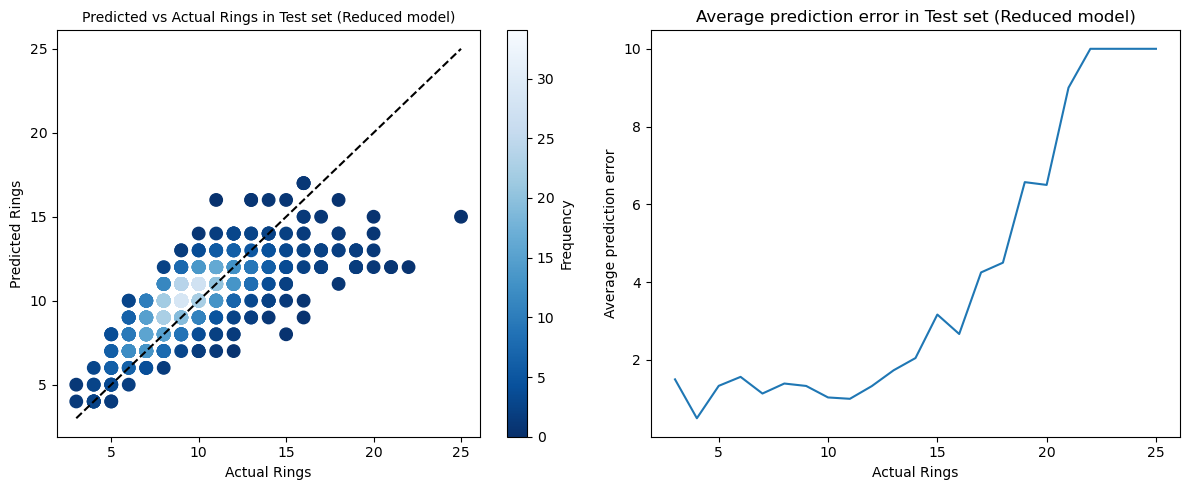

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Calculate the density for each pair of predicted Rings and actual Rings
pair_rf = np.vstack([abalone_test_y, y_pred_reduced])
density_rf = gaussian_kde(pair_rf)(pair_rf)
freq_rf = density_rf * len(abalone_test_y)
ring_values = np.unique(abalone_test_y)

# Plot the scatterplot of all the test instances (predicted Rings vs Actual Rings)
scatter = axs[0].scatter(abalone_test_y, y_pred_reduced, c=freq_rf, cmap="Blues_r",s=80, vmin=0, vmax=np.max(freq_rf)*1.2)
cbar = plt.colorbar(scatter, ax=axs[0])
cbar.set_label('Frequency')
axs[0].set_xlabel('Actual Rings')
axs[0].set_ylabel('Predicted Rings')
axs[0].plot(ring_values, ring_values, 'k--')
axs[0].set_title('Predicted vs Actual Rings in Test set (Reduced model)', fontsize = 10)

# Compute the average prediction error for each ring value
errors_reduced = np.abs(y_pred_reduced - abalone_test_y)

avg_errors_reduced = []
for ring in ring_values:
    avg_error = np.mean(errors_reduced[abalone_test_y == ring])
    avg_errors_reduced.append(avg_error)

# Plot average prediction error vs Actual Rings
axs[1].plot(ring_values, avg_errors_reduced)
axs[1].set_xlabel('Actual Rings')
axs[1].set_ylabel('Average prediction error')
axs[1].set_title('Average prediction error in Test set (Reduced model)')

plt.tight_layout()
plt.show()

From the above plot on the left, we can see when the Actual Rings are between 7 and 12, majority of the test instances are predicted correctly or very close to the actual values. However, when the Actual Rings is equal to or greater than 15, the variance between the predicted values and actual values increased, the dots are having greater distance from the diagonal (True line). There are none test instances get predicted correctly, which can be seen by none of them lie on the true line.

To confirm this observation in terms of average prediction error for each actual ring value, we can observe from the plot on the right, the average prediction error increased significantly once the Actual Rings is and beyond 15. An increase trend in average prediction error is noted with the increasing value of Actual Rings, representing the distance between actual Rings and predicted Rings increases.

We believe this increasing error trend consistent to one of our previous data exploration finding in Section 3.2.1 - that we observed the distribution of the target variables is slightly right-skewed having significantly fewer instance with number of rings greater than 15. Below we can plot the Actual Rings distribution in training data to confirm our finding.

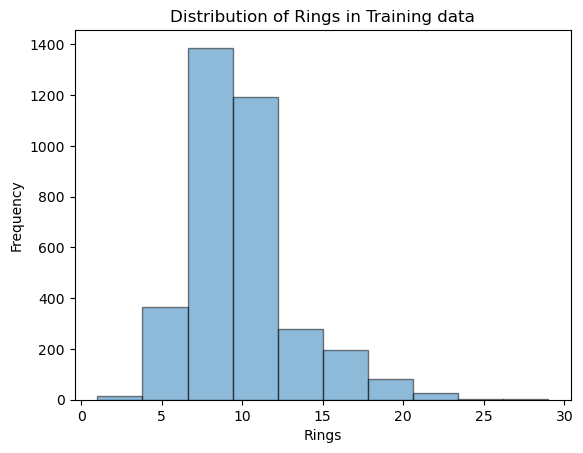

In [69]:
# Plot the histogram in counting the number of instances for each ring value in the training set
counts, bins, _ = plt.hist(abalone_train_y, alpha=0.5, edgecolor = "black")
plt.xlabel("Rings")
plt.ylabel("Frequency")
plt.title("Distribution of Rings in Training data")
plt.show()

### 3.5.4 Bagging Regressor with 500 SVM Regressors

In this section, we will train a Bagging regressor with 500 indivdiul SVM regressors as the base estimators in full-dimensional dataset. And we will explore its performance and compare with the Full model Random Forest Regressor in Section 3.5.3.1

In the training of individual SVM regressors, we will manually experiment with few hyperparameters, such as (i) types of decision boundary applied (kernel), (ii) Regularisation strength hyperparemeter (C) and (iii) Regularisation hyperparameter (epsilon), and use grid search to find the optimal combination to train the base estimators.

- kernel: We will check for all the kernel types available and search for the optimal one. The difference between these kernel types (linear, poly, rbf and sigmoid) are the shape of the decision boundary to be, keeping linear to be the simpliest (highest bias but lowest varience) and increasing complexity of the boundary for the other 3 types (reducing bias but increasing varience).

- C: Regularisation hyperparameter controls the regularisation strength. Increasing balance of C will decrease the regularisation strength, increase models' variance and reduce the bias, which may lead to overfitting. We will experimeter the C with 0.01, 0.1, 1, 10 and 100, which represent 5 different degrees of regularisation respectively, to determine the optimal value.

- epsilon: Regularisation hyperparameter controls the width of the margin in the SVM regessor, which the SVM Regressors try to fit as many instances as possible on the street while limiting the margin violations. The larger the epsilon, the wider the street and more generalised of the model. We will experimeter the epsilon with 0.01, 0.1, 1, 10 and 100, which represent 5 different degrees of regularisation respectively, to determine the optimal value.

In [70]:
abalone_svm_reg_gs = SVR()

# Set up parameter grid for grid search
svm_param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 1, 10, 100], 
    'epsilon': [0.01,0.1, 1, 10, 100]
}

# Set up grid search with SVM regressor and parameter grid
svm_indiv_gs = GridSearchCV(abalone_svm_reg_gs, svm_param_grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=3)

# Fit grid search to training data
svm_indiv_gs.fit(abalone_train_x, abalone_train_y)

# Print best hyperparameters and corresponding score
print('Best hyperparameters:', svm_indiv_gs.best_params_)
#print('Corresponding score:', sqrt(-svm_indiv_gs.best_score_))

Best hyperparameters: {'C': 10, 'epsilon': 1, 'kernel': 'rbf'}


From the grid serach, we have search the optimal combination of the hyperparameters is kernal = 'rbf', C = 10 and epsilon = 1. These indicate what we are expecting from the decision boundary of the SVM regression is in  radial basis function, which takes into account the similarity or distance between two instances in the feature space and transforms the data into a higher dimensional space where the classes become linearly separable. In terms of optimal C and epsilon, we are expecting a moderate degree of regularisation in the model, which provide us reasonable balance between variance and bias.

We then train the individual SVM regressor and Bagging regressor with the optimal combination of hyperparameters. For the hyperparametes of Bagging regressor, we have use the same combination as the Full model Random Forest regressor for better comparison in later stage.

In [71]:
# Set up SVM regressor with hyperparameters
abalone_svm_reg = SVR(kernel='rbf', C=10, epsilon=1)

# Create Bagging regressor with 500 SVM base estimators
abalone_bagging_reg = BaggingRegressor(base_estimator=abalone_svm_reg, random_state=91,
                                        n_estimators=500,
                                        max_features=3, max_samples=1.0)

# Fit Bagging regressor to training data
abalone_bagging_reg.fit(abalone_train_x, abalone_train_y)

BaggingRegressor(base_estimator=SVR(C=10, epsilon=1), max_features=3,
                 n_estimators=500, random_state=91)

In [72]:
# Use Bagging regressor to make predictions on test data
y_pred_bagging = abalone_bagging_reg.predict(abalone_test_x)
y_pred_bagging = np.round(y_pred_bagging)

# Calculate RMSE of predictions for test set
rmse_bagging = np.sqrt(mean_squared_error(abalone_test_y, y_pred_bagging))
print("Bagging regressor Test set RMSE: {:.4f}".format(rmse_bagging))

# Compute Test set R-squared
score_bagging = abalone_bagging_reg.score(abalone_test_x, abalone_test_y)
print("Bagging regressor Test set R-squared: {:.4f}".format(score_bagging))

Bagging regressor Test set RMSE: 2.2655
Bagging regressor Test set R-squared: 0.5008


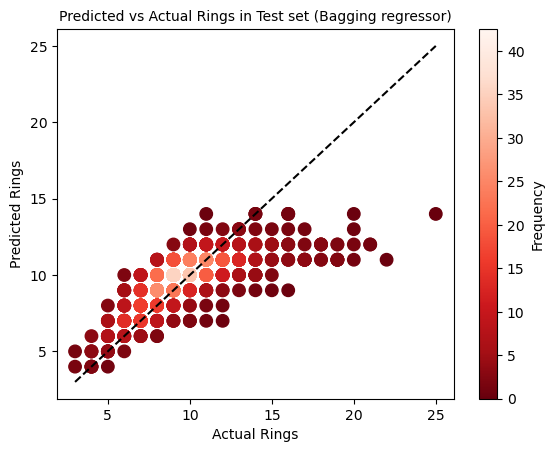

In [73]:
# Calculate the density for each pair of predicted Rings and actual Rings
pair_bagging = np.vstack([abalone_test_y, y_pred_bagging])
density_bagging = gaussian_kde(pair_bagging)(pair_bagging)
freq_bagging = density_bagging * len(abalone_test_y)

# Plot the scatterplot of all the test instances (predicted Rings vs Actual Rings)
scatter_bagging = plt.scatter(abalone_test_y, y_pred_bagging, c=freq_bagging, cmap="Reds_r",s=80, vmin=0, vmax=np.max(freq_bagging)*1.2)
cbar = plt.colorbar(scatter_bagging)
cbar.set_label('Frequency')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.plot(ring_values, ring_values, 'k--')
plt.title('Predicted vs Actual Rings in Test set (Bagging regressor)', fontsize = 10)
plt.show()

From the above performance measures, we can observe the test set RMSE for bagging regressor is 2.2655, which is reasonably small, and R-squared is 0.5008, which means 50% of the variance between predicted and actual values can be explained by the model. These measures represent Bagging regressor performs quite satisfactorily on unseen data.

As from the plot illustrating the prediction vs actual values, we can see  we can see when the Actual Rings are between 7 and 12, majority of the test instances are predicted correctly or close to the actual values. However, when the Actual Rings is equal to or greater than 15, the variance between the predicted values and actual values increased, the dots are having greater distance from the diagonal (True line). There are none test instances get predicted correctly, which can be seen by none of them lie on the true line.

Such trend may due to the limited number of training instances on having number of rings greater than 15, that we discussed in the previous sections.

Overall, the Bagging regressor performs reasonably satisfactory, especially when the Actual Rings lie between 7 and 12.

### 3.5.5 Performance Measures (Random Forest Regressor (Full model) vs Bagging Regressor)

In [74]:
# Compare Test set RMSE
print("Test set RMSE:")
print('Full model Random Forest Regressor: {:.4f}'.format(rmse_rf))
print('Bagging Regressor: {:.4f}'.format(rmse_bagging))

# Compare Test set R-squared
print("\nTest set R-squared:")
print("Full model Random Forest Regressor: {:.4f}".format(score_rf))
print("Bagging Regressor: {:.4f}".format(score_bagging))

Test set RMSE:
Full model Random Forest Regressor: 2.1406
Bagging Regressor: 2.2655

Test set R-squared:
Full model Random Forest Regressor: 0.5598
Bagging Regressor: 0.5008


Regarding the performance of the Bagging regressor, we can see the test set RMSE is 2.2655, which is slightly higher than Full model Random Forest regressor in Section 3.5.3.1 (2.1406), which indicates the Full model Random Forest regressor outperforms the Bagging regressor with small magnitude of errors.

As for R-squared, we can observe the test set R-squared in Bagging regressor is 0.5008, which is lower than that of Random Forest regressor (0.5598). This means the Random Forest Regressor can perform better on explaining the variance between predicted value and actual value than Bagging Regressor (by 5 percentage points more).

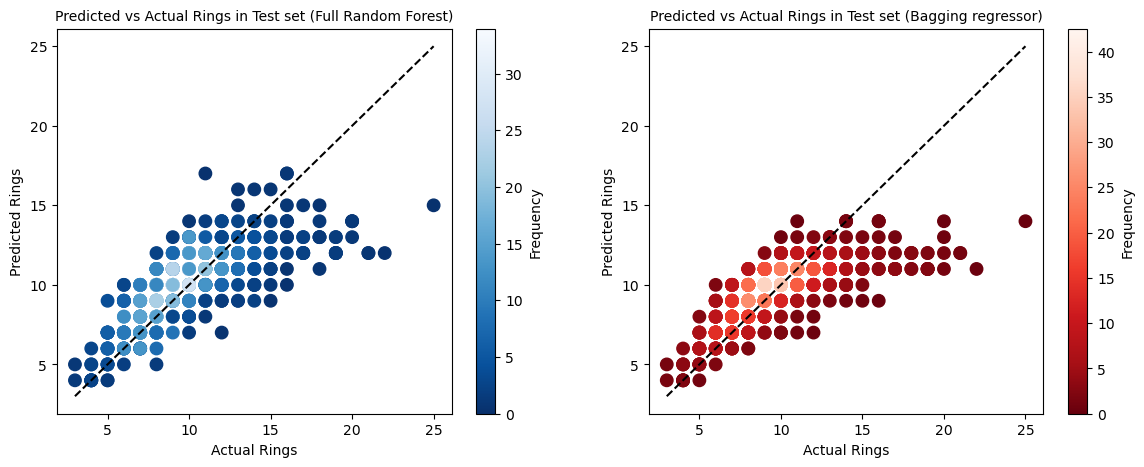

In [77]:
figs, ax = plt.subplots(1, 2, figsize=(14, 5))

# Calculate the density for each pair of predicted Rings and actual Rings
pair_rf_full = np.vstack([abalone_test_y, y_pred_rf])
density_rf_full = gaussian_kde(pair_rf_full)(pair_rf_full)
freq_rf_full = density_rf_full * len(abalone_test_y)

# Plot the scatterplot of all the test instances (predicted Rings vs Actual Rings)
scatter = ax[0].scatter(abalone_test_y, y_pred_rf, c=freq_rf, cmap="Blues_r",s=80, vmin=0, vmax=np.max(freq_rf_full)*1.2)
cbar = plt.colorbar(scatter, ax=ax[0])
cbar.set_label('Frequency')
ax[0].set_xlabel('Actual Rings')
ax[0].set_ylabel('Predicted Rings')
ax[0].plot(ring_values, ring_values, 'k--')
ax[0].set_title('Predicted vs Actual Rings in Test set (Full Random Forest)', fontsize = 10)

# Plot the scatterplot of all the test instances (predicted Rings vs Actual Rings)
scatter_bagging = ax[1].scatter(abalone_test_y, y_pred_bagging, c=freq_bagging, cmap="Reds_r",s=80, vmin=0, vmax=np.max(freq_bagging)*1.2)
cbar = plt.colorbar(scatter_bagging, ax=ax[1])
cbar.set_label('Frequency')
ax[1].set_xlabel('Actual Rings')
ax[1].set_ylabel('Predicted Rings')
ax[1].plot(ring_values, ring_values, 'k--')
ax[1].set_title('Predicted vs Actual Rings in Test set (Bagging regressor)', fontsize = 10)

plt.show()

From the above plots, we can see overall similar patterns between both regressors. However, Full model Random Forest Regressor performs a bit better than Bagging regressor since we can observe the distance between the predictions and true line for those with larger number of Rings are closer in Random Forest regressor.

We understand that the Random Forest algorithm are generally trained via bagging method. Thus, the better performance in Random Forest regressor with 500 Decision Trees than Bagging regressor with 500 SVM may mainly attribute by the better performance in the underlying base estimators (Decision Tree algorithms vs SVM aglorithms) in this case. As we observed in the data exploration section, the dataset contains some skewed features with outliers. Since SVM is more sensitive to outliers than Decision Tree, this may be the case on the difference in performance we discovered in this assignment.

Owing to the scope of this assignment, we are only required to perform comparision between Random Forest regressor and Bagging regressor with SVM base estimator. However, there are more supervised machine learning algorithms, such as k-NN Regression model, may even outperform the Random Forest regressor. Hence, a possible next step would be including other algorithms and compare against their performance to Random Forest Regression model again.